# GANUNET5
## inference using transfer learned ESRGAN+UNET5

# Dependencies

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
from PIL import Image
import tensorflow as tf
from ISR.models import RRDN
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from tifffile import imsave
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE
from csbdeep.utils import normalize

In [2]:
os.path.abspath(os.getcwd())

'C:\\Users\\chery\\Downloads\\MSImgRes-main\\GANUNET'

## GPU implementation (optional)

In [5]:
tf.test.gpu_device_name()

''

# Load trained weights

In [3]:
rrdn = RRDN(arch_params={'C': 4, 'D':3, 'G':32, 'G0':32, 'T': 10, 'x':4})
rrdn.model.load_weights('rrdn-C4-D3-G32-G032-T10-x4_best-val_generator_loss_epoch051.hdf5')
model = CARE(config=None, name='400s_40ep_0.5n', basedir='')

C:\Users\chery\anaconda3\envs\imgres\lib\site-packages\keras\initializers\initializers_v2.py:121: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  f"The initializer {self.__class__.__name__} is unseeded "


Loading network weights from 'weights_best.h5'.


# GANUNET Restoration from trained weights

### load .png format; restore and then save to .png format
### define input directory with 'ddir', output images will be saved to ddir/SR

In [4]:
def normalize8(I):
    mn = I.min()
    mx = I.max()
    mx -= mn
    I = ((I - mn)/mx) * 255.0 
    return np.round(I).astype(np.uint8)

In [12]:
ddir = 'C:/Users/chery/Downloads/MSImgRes-main/test images/'
filelist = os.listdir(ddir)
out_path = os.path.join(ddir,'SR/')
os.mkdir(out_path)
for i in tqdm(filelist):
    if i.endswith(".png"):
        img = Image.open(ddir+ i)
        sr_img = rrdn.predict(np.array(img))
        sr_img = np.array(sr_img)[:,:,0]
        restored = model.predict(sr_img, axes='YX')
        restored = normalize8(restored)
        im = Image.fromarray(restored)
        im.save(out_path + i)

  0%|                                                                                          | 0/670 [00:00<?, ?it/s]

1/1 [==============================] - 0s 88ms/step


  0%|                                                                                  | 1/670 [00:00<05:40,  1.96it/s]

1/1 [==============================] - 0s 76ms/step


  0%|▏                                                                                 | 2/670 [00:00<05:19,  2.09it/s]

1/1 [==============================] - 0s 90ms/step


  0%|▎                                                                                 | 3/670 [00:01<05:29,  2.02it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▍                                                                                 | 4/670 [00:01<05:22,  2.06it/s]

1/1 [==============================] - 0s 89ms/step


  1%|▌                                                                                 | 5/670 [00:02<05:22,  2.06it/s]

1/1 [==============================] - 0s 75ms/step


  1%|▋                                                                                 | 6/670 [00:02<05:18,  2.09it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▊                                                                                 | 7/670 [00:03<05:18,  2.08it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▉                                                                                 | 8/670 [00:03<05:16,  2.09it/s]

1/1 [==============================] - 0s 88ms/step


  1%|█                                                                                 | 9/670 [00:04<05:15,  2.09it/s]

1/1 [==============================] - 0s 79ms/step


  1%|█▏                                                                               | 10/670 [00:04<05:13,  2.10it/s]

1/1 [==============================] - 0s 91ms/step


  2%|█▎                                                                               | 11/670 [00:05<05:10,  2.12it/s]

1/1 [==============================] - 0s 88ms/step


  2%|█▍                                                                               | 12/670 [00:05<05:15,  2.08it/s]

1/1 [==============================] - 0s 93ms/step


  2%|█▌                                                                               | 13/670 [00:06<05:21,  2.04it/s]

1/1 [==============================] - 0s 92ms/step


  2%|█▋                                                                               | 14/670 [00:06<05:24,  2.02it/s]

1/1 [==============================] - 0s 88ms/step


  2%|█▊                                                                               | 15/670 [00:07<05:21,  2.04it/s]

1/1 [==============================] - 0s 87ms/step


  2%|█▉                                                                               | 16/670 [00:07<05:17,  2.06it/s]

1/1 [==============================] - 0s 90ms/step


  3%|██                                                                               | 17/670 [00:08<05:18,  2.05it/s]

1/1 [==============================] - 0s 87ms/step


  3%|██▏                                                                              | 18/670 [00:08<05:22,  2.02it/s]

1/1 [==============================] - 0s 95ms/step


  3%|██▎                                                                              | 19/670 [00:09<05:23,  2.01it/s]

1/1 [==============================] - 0s 94ms/step


  3%|██▍                                                                              | 20/670 [00:09<05:20,  2.03it/s]

1/1 [==============================] - 0s 86ms/step


  3%|██▌                                                                              | 21/670 [00:10<05:17,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


  3%|██▋                                                                              | 22/670 [00:10<05:15,  2.05it/s]

1/1 [==============================] - 0s 90ms/step


  3%|██▊                                                                              | 23/670 [00:11<05:14,  2.06it/s]

1/1 [==============================] - 0s 91ms/step


  4%|██▉                                                                              | 24/670 [00:11<05:18,  2.03it/s]

1/1 [==============================] - 0s 88ms/step


  4%|███                                                                              | 25/670 [00:12<05:18,  2.03it/s]

1/1 [==============================] - 0s 86ms/step


  4%|███▏                                                                             | 26/670 [00:12<05:16,  2.03it/s]

1/1 [==============================] - 0s 93ms/step


  4%|███▎                                                                             | 27/670 [00:13<05:28,  1.96it/s]

1/1 [==============================] - 0s 94ms/step


  4%|███▍                                                                             | 28/670 [00:13<05:23,  1.98it/s]

1/1 [==============================] - 0s 93ms/step


  4%|███▌                                                                             | 29/670 [00:14<05:19,  2.00it/s]

1/1 [==============================] - 0s 87ms/step


  4%|███▋                                                                             | 30/670 [00:14<05:19,  2.00it/s]

1/1 [==============================] - 0s 84ms/step


  5%|███▋                                                                             | 31/670 [00:15<05:12,  2.05it/s]

1/1 [==============================] - 0s 86ms/step


  5%|███▊                                                                             | 32/670 [00:15<05:11,  2.05it/s]

1/1 [==============================] - 0s 82ms/step


  5%|███▉                                                                             | 33/670 [00:16<05:09,  2.06it/s]

1/1 [==============================] - 0s 88ms/step


  5%|████                                                                             | 34/670 [00:16<05:10,  2.05it/s]

1/1 [==============================] - 0s 87ms/step


  5%|████▏                                                                            | 35/670 [00:17<05:08,  2.06it/s]

1/1 [==============================] - 0s 88ms/step


  5%|████▎                                                                            | 36/670 [00:17<05:12,  2.03it/s]

1/1 [==============================] - 0s 81ms/step


  6%|████▍                                                                            | 37/670 [00:18<05:10,  2.04it/s]

1/1 [==============================] - 0s 86ms/step


  6%|████▌                                                                            | 38/670 [00:18<05:07,  2.06it/s]

1/1 [==============================] - 0s 77ms/step


  6%|████▋                                                                            | 39/670 [00:19<05:01,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


  6%|████▊                                                                            | 40/670 [00:19<05:02,  2.08it/s]

1/1 [==============================] - 0s 77ms/step


  6%|████▉                                                                            | 41/670 [00:19<04:59,  2.10it/s]

1/1 [==============================] - 0s 80ms/step


  6%|█████                                                                            | 42/670 [00:20<04:52,  2.15it/s]

1/1 [==============================] - 0s 80ms/step


  6%|█████▏                                                                           | 43/670 [00:20<04:47,  2.18it/s]

1/1 [==============================] - 0s 79ms/step


  7%|█████▎                                                                           | 44/670 [00:21<04:42,  2.22it/s]

1/1 [==============================] - 0s 75ms/step


  7%|█████▍                                                                           | 45/670 [00:21<04:36,  2.26it/s]

1/1 [==============================] - 0s 76ms/step


  7%|█████▌                                                                           | 46/670 [00:22<04:35,  2.26it/s]

1/1 [==============================] - 0s 77ms/step


  7%|█████▋                                                                           | 47/670 [00:22<04:30,  2.31it/s]

1/1 [==============================] - 0s 77ms/step


  7%|█████▊                                                                           | 48/670 [00:23<04:27,  2.33it/s]

1/1 [==============================] - 0s 85ms/step


  7%|█████▉                                                                           | 49/670 [00:23<04:27,  2.32it/s]

1/1 [==============================] - 0s 74ms/step


  7%|██████                                                                           | 50/670 [00:23<04:26,  2.33it/s]

1/1 [==============================] - 0s 75ms/step


  8%|██████▏                                                                          | 51/670 [00:24<04:24,  2.34it/s]

1/1 [==============================] - 0s 77ms/step


  8%|██████▎                                                                          | 52/670 [00:24<04:22,  2.36it/s]

1/1 [==============================] - 0s 83ms/step


  8%|██████▍                                                                          | 53/670 [00:25<04:24,  2.33it/s]

1/1 [==============================] - 0s 85ms/step


  8%|██████▌                                                                          | 54/670 [00:25<04:28,  2.30it/s]

1/1 [==============================] - 0s 77ms/step


  8%|██████▋                                                                          | 55/670 [00:26<04:24,  2.32it/s]

1/1 [==============================] - 0s 77ms/step


  8%|██████▊                                                                          | 56/670 [00:26<04:23,  2.33it/s]

1/1 [==============================] - 0s 73ms/step


  9%|██████▉                                                                          | 57/670 [00:26<04:22,  2.33it/s]

1/1 [==============================] - 0s 81ms/step


  9%|███████                                                                          | 58/670 [00:27<04:22,  2.33it/s]

1/1 [==============================] - 0s 82ms/step


  9%|███████▏                                                                         | 59/670 [00:27<04:25,  2.30it/s]

1/1 [==============================] - 0s 82ms/step


  9%|███████▎                                                                         | 60/670 [00:28<04:28,  2.28it/s]

1/1 [==============================] - 0s 77ms/step


  9%|███████▎                                                                         | 61/670 [00:28<04:24,  2.30it/s]

1/1 [==============================] - 0s 77ms/step


  9%|███████▍                                                                         | 62/670 [00:29<04:21,  2.32it/s]

1/1 [==============================] - 0s 78ms/step


  9%|███████▌                                                                         | 63/670 [00:29<04:20,  2.33it/s]

1/1 [==============================] - 0s 73ms/step


 10%|███████▋                                                                         | 64/670 [00:29<04:18,  2.34it/s]

1/1 [==============================] - 0s 79ms/step


 10%|███████▊                                                                         | 65/670 [00:30<04:18,  2.34it/s]

1/1 [==============================] - 0s 78ms/step


 10%|███████▉                                                                         | 66/670 [00:30<04:18,  2.33it/s]

1/1 [==============================] - 0s 77ms/step


 10%|████████                                                                         | 67/670 [00:31<04:17,  2.34it/s]

1/1 [==============================] - 0s 76ms/step


 10%|████████▏                                                                        | 68/670 [00:31<04:17,  2.34it/s]

1/1 [==============================] - 0s 78ms/step


 10%|████████▎                                                                        | 69/670 [00:32<04:15,  2.35it/s]

1/1 [==============================] - 0s 89ms/step


 10%|████████▍                                                                        | 70/670 [00:32<04:29,  2.23it/s]

1/1 [==============================] - 0s 81ms/step


 11%|████████▌                                                                        | 71/670 [00:32<04:33,  2.19it/s]

1/1 [==============================] - 0s 76ms/step


 11%|████████▋                                                                        | 72/670 [00:33<04:25,  2.25it/s]

1/1 [==============================] - 0s 74ms/step


 11%|████████▊                                                                        | 73/670 [00:33<04:19,  2.30it/s]

1/1 [==============================] - 0s 77ms/step


 11%|████████▉                                                                        | 74/670 [00:34<04:15,  2.33it/s]

1/1 [==============================] - 0s 79ms/step


 11%|█████████                                                                        | 75/670 [00:34<04:13,  2.35it/s]

1/1 [==============================] - 0s 82ms/step


 11%|█████████▏                                                                       | 76/670 [00:35<04:12,  2.35it/s]

1/1 [==============================] - 0s 80ms/step


 11%|█████████▎                                                                       | 77/670 [00:35<04:13,  2.34it/s]

1/1 [==============================] - 0s 77ms/step


 12%|█████████▍                                                                       | 78/670 [00:35<04:10,  2.37it/s]

1/1 [==============================] - 0s 76ms/step


 12%|█████████▌                                                                       | 79/670 [00:36<04:07,  2.39it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█████████▋                                                                       | 80/670 [00:36<04:06,  2.40it/s]

1/1 [==============================] - 0s 79ms/step


 12%|█████████▊                                                                       | 81/670 [00:37<04:05,  2.40it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█████████▉                                                                       | 82/670 [00:37<04:06,  2.39it/s]

1/1 [==============================] - 0s 78ms/step


 12%|██████████                                                                       | 83/670 [00:38<04:07,  2.37it/s]

1/1 [==============================] - 0s 77ms/step


 13%|██████████▏                                                                      | 84/670 [00:38<04:08,  2.36it/s]

1/1 [==============================] - 0s 76ms/step


 13%|██████████▎                                                                      | 85/670 [00:38<04:07,  2.37it/s]

1/1 [==============================] - 0s 76ms/step


 13%|██████████▍                                                                      | 86/670 [00:39<04:07,  2.36it/s]

1/1 [==============================] - 0s 78ms/step


 13%|██████████▌                                                                      | 87/670 [00:39<04:06,  2.37it/s]

1/1 [==============================] - 0s 78ms/step


 13%|██████████▋                                                                      | 88/670 [00:40<04:09,  2.34it/s]

1/1 [==============================] - 0s 77ms/step


 13%|██████████▊                                                                      | 89/670 [00:40<04:10,  2.32it/s]

1/1 [==============================] - 0s 77ms/step


 13%|██████████▉                                                                      | 90/670 [00:41<04:07,  2.34it/s]

1/1 [==============================] - 0s 78ms/step


 14%|███████████                                                                      | 91/670 [00:41<04:08,  2.33it/s]

1/1 [==============================] - 0s 76ms/step


 14%|███████████                                                                      | 92/670 [00:41<04:09,  2.32it/s]

1/1 [==============================] - 0s 78ms/step


 14%|███████████▏                                                                     | 93/670 [00:42<04:09,  2.31it/s]

1/1 [==============================] - 0s 77ms/step


 14%|███████████▎                                                                     | 94/670 [00:42<04:08,  2.32it/s]

1/1 [==============================] - 0s 76ms/step


 14%|███████████▍                                                                     | 95/670 [00:43<04:07,  2.32it/s]

1/1 [==============================] - 0s 80ms/step


 14%|███████████▌                                                                     | 96/670 [00:43<04:11,  2.29it/s]

1/1 [==============================] - 0s 86ms/step


 14%|███████████▋                                                                     | 97/670 [00:44<04:13,  2.26it/s]

1/1 [==============================] - 0s 88ms/step


 15%|███████████▊                                                                     | 98/670 [00:44<04:22,  2.18it/s]

1/1 [==============================] - 0s 76ms/step


 15%|███████████▉                                                                     | 99/670 [00:45<04:18,  2.21it/s]

1/1 [==============================] - 0s 78ms/step


 15%|███████████▉                                                                    | 100/670 [00:45<04:11,  2.26it/s]

1/1 [==============================] - 0s 78ms/step


 15%|████████████                                                                    | 101/670 [00:45<04:08,  2.29it/s]

1/1 [==============================] - 0s 80ms/step


 15%|████████████▏                                                                   | 102/670 [00:46<04:11,  2.26it/s]

1/1 [==============================] - 0s 79ms/step


 15%|████████████▎                                                                   | 103/670 [00:46<04:09,  2.27it/s]

1/1 [==============================] - 0s 75ms/step


 16%|████████████▍                                                                   | 104/670 [00:47<04:06,  2.30it/s]

1/1 [==============================] - 0s 81ms/step


 16%|████████████▌                                                                   | 105/670 [00:47<04:07,  2.29it/s]

1/1 [==============================] - 0s 78ms/step


 16%|████████████▋                                                                   | 106/670 [00:48<04:06,  2.28it/s]

1/1 [==============================] - 0s 80ms/step


 16%|████████████▊                                                                   | 107/670 [00:48<04:09,  2.26it/s]

1/1 [==============================] - 0s 81ms/step


 16%|████████████▉                                                                   | 108/670 [00:48<04:10,  2.24it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█████████████                                                                   | 109/670 [00:49<04:08,  2.25it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█████████████▏                                                                  | 110/670 [00:49<04:07,  2.26it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█████████████▎                                                                  | 111/670 [00:50<04:09,  2.24it/s]

1/1 [==============================] - 0s 83ms/step


 17%|█████████████▎                                                                  | 112/670 [00:50<04:14,  2.19it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█████████████▍                                                                  | 113/670 [00:51<04:14,  2.19it/s]

1/1 [==============================] - 0s 85ms/step


 17%|█████████████▌                                                                  | 114/670 [00:51<04:12,  2.20it/s]

1/1 [==============================] - 0s 85ms/step


 17%|█████████████▋                                                                  | 115/670 [00:52<04:15,  2.17it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█████████████▊                                                                  | 116/670 [00:52<04:13,  2.19it/s]

1/1 [==============================] - 0s 80ms/step


 17%|█████████████▉                                                                  | 117/670 [00:53<04:12,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 18%|██████████████                                                                  | 118/670 [00:53<04:12,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 18%|██████████████▏                                                                 | 119/670 [00:53<04:11,  2.19it/s]

1/1 [==============================] - 0s 80ms/step


 18%|██████████████▎                                                                 | 120/670 [00:54<04:10,  2.20it/s]

1/1 [==============================] - 0s 81ms/step


 18%|██████████████▍                                                                 | 121/670 [00:54<04:08,  2.21it/s]

1/1 [==============================] - 0s 84ms/step


 18%|██████████████▌                                                                 | 122/670 [00:55<04:09,  2.19it/s]

1/1 [==============================] - 0s 82ms/step


 18%|██████████████▋                                                                 | 123/670 [00:55<04:08,  2.20it/s]

1/1 [==============================] - 0s 81ms/step


 19%|██████████████▊                                                                 | 124/670 [00:56<04:07,  2.20it/s]

1/1 [==============================] - 0s 93ms/step


 19%|██████████████▉                                                                 | 125/670 [00:56<04:08,  2.20it/s]

1/1 [==============================] - 0s 81ms/step


 19%|███████████████                                                                 | 126/670 [00:57<04:08,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 19%|███████████████▏                                                                | 127/670 [00:57<04:07,  2.20it/s]

1/1 [==============================] - 0s 78ms/step


 19%|███████████████▎                                                                | 128/670 [00:58<04:05,  2.21it/s]

1/1 [==============================] - 0s 79ms/step


 19%|███████████████▍                                                                | 129/670 [00:58<04:06,  2.20it/s]

1/1 [==============================] - 0s 79ms/step


 19%|███████████████▌                                                                | 130/670 [00:58<04:06,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 20%|███████████████▋                                                                | 131/670 [00:59<04:06,  2.19it/s]

1/1 [==============================] - 0s 82ms/step


 20%|███████████████▊                                                                | 132/670 [00:59<04:05,  2.19it/s]

1/1 [==============================] - 0s 83ms/step


 20%|███████████████▉                                                                | 133/670 [01:00<04:05,  2.19it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████████                                                                | 134/670 [01:00<04:04,  2.19it/s]

1/1 [==============================] - 0s 82ms/step


 20%|████████████████                                                                | 135/670 [01:01<04:04,  2.19it/s]

1/1 [==============================] - 0s 83ms/step


 20%|████████████████▏                                                               | 136/670 [01:01<04:04,  2.18it/s]

1/1 [==============================] - 0s 84ms/step


 20%|████████████████▎                                                               | 137/670 [01:02<04:03,  2.19it/s]

1/1 [==============================] - 0s 81ms/step


 21%|████████████████▍                                                               | 138/670 [01:02<04:02,  2.19it/s]

1/1 [==============================] - 0s 82ms/step


 21%|████████████████▌                                                               | 139/670 [01:03<04:02,  2.19it/s]

1/1 [==============================] - 0s 79ms/step


 21%|████████████████▋                                                               | 140/670 [01:03<04:02,  2.18it/s]

1/1 [==============================] - 0s 78ms/step


 21%|████████████████▊                                                               | 141/670 [01:04<04:01,  2.19it/s]

1/1 [==============================] - 0s 80ms/step


 21%|████████████████▉                                                               | 142/670 [01:04<04:01,  2.18it/s]

1/1 [==============================] - 0s 81ms/step


 21%|█████████████████                                                               | 143/670 [01:04<04:01,  2.18it/s]

1/1 [==============================] - 0s 83ms/step


 21%|█████████████████▏                                                              | 144/670 [01:05<04:02,  2.17it/s]

1/1 [==============================] - 0s 81ms/step


 22%|█████████████████▎                                                              | 145/670 [01:05<04:02,  2.17it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████████▍                                                              | 146/670 [01:06<04:01,  2.17it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████████▌                                                              | 147/670 [01:06<03:59,  2.18it/s]

1/1 [==============================] - 0s 84ms/step


 22%|█████████████████▋                                                              | 148/670 [01:07<03:59,  2.18it/s]

1/1 [==============================] - 0s 85ms/step


 22%|█████████████████▊                                                              | 149/670 [01:07<03:59,  2.17it/s]

1/1 [==============================] - 0s 82ms/step


 22%|█████████████████▉                                                              | 150/670 [01:08<03:59,  2.17it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██████████████████                                                              | 151/670 [01:08<03:57,  2.18it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██████████████████▏                                                             | 152/670 [01:09<03:57,  2.18it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██████████████████▎                                                             | 153/670 [01:09<03:57,  2.17it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██████████████████▍                                                             | 154/670 [01:09<03:57,  2.17it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██████████████████▌                                                             | 155/670 [01:10<03:57,  2.17it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██████████████████▋                                                             | 156/670 [01:10<03:56,  2.17it/s]

1/1 [==============================] - 0s 85ms/step


 23%|██████████████████▋                                                             | 157/670 [01:11<03:57,  2.16it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██████████████████▊                                                             | 158/670 [01:11<03:58,  2.15it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██████████████████▉                                                             | 159/670 [01:12<03:57,  2.15it/s]

1/1 [==============================] - 0s 81ms/step


 24%|███████████████████                                                             | 160/670 [01:12<03:56,  2.16it/s]

1/1 [==============================] - 0s 82ms/step


 24%|███████████████████▏                                                            | 161/670 [01:13<03:55,  2.16it/s]

1/1 [==============================] - 0s 87ms/step


 24%|███████████████████▎                                                            | 162/670 [01:13<03:56,  2.15it/s]

1/1 [==============================] - 0s 82ms/step


 24%|███████████████████▍                                                            | 163/670 [01:14<03:54,  2.16it/s]

1/1 [==============================] - 0s 80ms/step


 24%|███████████████████▌                                                            | 164/670 [01:14<03:51,  2.18it/s]

1/1 [==============================] - 0s 80ms/step


 25%|███████████████████▋                                                            | 165/670 [01:15<03:50,  2.19it/s]

1/1 [==============================] - 0s 81ms/step


 25%|███████████████████▊                                                            | 166/670 [01:15<03:48,  2.20it/s]

1/1 [==============================] - 0s 82ms/step


 25%|███████████████████▉                                                            | 167/670 [01:15<03:48,  2.20it/s]

1/1 [==============================] - 0s 81ms/step


 25%|████████████████████                                                            | 168/670 [01:16<03:48,  2.20it/s]

1/1 [==============================] - 0s 84ms/step


 25%|████████████████████▏                                                           | 169/670 [01:16<03:46,  2.21it/s]

1/1 [==============================] - 0s 83ms/step


 25%|████████████████████▎                                                           | 170/670 [01:17<03:46,  2.21it/s]

1/1 [==============================] - 0s 80ms/step


 26%|████████████████████▍                                                           | 171/670 [01:17<03:45,  2.21it/s]

1/1 [==============================] - 0s 83ms/step


 26%|████████████████████▌                                                           | 172/670 [01:18<03:46,  2.20it/s]

1/1 [==============================] - 0s 84ms/step


 26%|████████████████████▋                                                           | 173/670 [01:18<03:45,  2.21it/s]

1/1 [==============================] - 0s 82ms/step


 26%|████████████████████▊                                                           | 174/670 [01:19<03:44,  2.21it/s]

1/1 [==============================] - 0s 80ms/step


 26%|████████████████████▉                                                           | 175/670 [01:19<03:43,  2.21it/s]

1/1 [==============================] - 0s 80ms/step


 26%|█████████████████████                                                           | 176/670 [01:20<03:43,  2.21it/s]

1/1 [==============================] - 0s 82ms/step


 26%|█████████████████████▏                                                          | 177/670 [01:20<03:44,  2.20it/s]

1/1 [==============================] - 0s 82ms/step


 27%|█████████████████████▎                                                          | 178/670 [01:20<03:44,  2.20it/s]

1/1 [==============================] - 0s 83ms/step


 27%|█████████████████████▎                                                          | 179/670 [01:21<03:44,  2.19it/s]

1/1 [==============================] - 0s 83ms/step


 27%|█████████████████████▍                                                          | 180/670 [01:21<03:44,  2.18it/s]

1/1 [==============================] - 0s 85ms/step


 27%|█████████████████████▌                                                          | 181/670 [01:22<03:44,  2.18it/s]

1/1 [==============================] - 0s 82ms/step


 27%|█████████████████████▋                                                          | 182/670 [01:22<03:45,  2.17it/s]

1/1 [==============================] - 0s 81ms/step


 27%|█████████████████████▊                                                          | 183/670 [01:23<03:43,  2.18it/s]

1/1 [==============================] - 0s 90ms/step


 27%|█████████████████████▉                                                          | 184/670 [01:23<03:44,  2.17it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██████████████████████                                                          | 185/670 [01:24<03:49,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 28%|██████████████████████▏                                                         | 186/670 [01:24<03:46,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 28%|██████████████████████▎                                                         | 187/670 [01:25<03:44,  2.15it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██████████████████████▍                                                         | 188/670 [01:25<03:41,  2.18it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██████████████████████▌                                                         | 189/670 [01:26<03:40,  2.19it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██████████████████████▋                                                         | 190/670 [01:26<03:41,  2.17it/s]

1/1 [==============================] - 0s 82ms/step


 29%|██████████████████████▊                                                         | 191/670 [01:26<03:38,  2.19it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██████████████████████▉                                                         | 192/670 [01:27<03:38,  2.18it/s]

1/1 [==============================] - 0s 83ms/step


 29%|███████████████████████                                                         | 193/670 [01:27<03:39,  2.18it/s]

1/1 [==============================] - 0s 83ms/step


 29%|███████████████████████▏                                                        | 194/670 [01:28<03:40,  2.16it/s]

1/1 [==============================] - 0s 82ms/step


 29%|███████████████████████▎                                                        | 195/670 [01:28<03:38,  2.17it/s]

1/1 [==============================] - 0s 82ms/step


 29%|███████████████████████▍                                                        | 196/670 [01:29<03:37,  2.18it/s]

1/1 [==============================] - 0s 85ms/step


 29%|███████████████████████▌                                                        | 197/670 [01:29<03:36,  2.19it/s]

1/1 [==============================] - 0s 84ms/step


 30%|███████████████████████▋                                                        | 198/670 [01:30<03:36,  2.18it/s]

1/1 [==============================] - 0s 81ms/step


 30%|███████████████████████▊                                                        | 199/670 [01:30<03:34,  2.19it/s]

1/1 [==============================] - 0s 78ms/step


 30%|███████████████████████▉                                                        | 200/670 [01:31<03:32,  2.21it/s]

1/1 [==============================] - 0s 80ms/step


 30%|████████████████████████                                                        | 201/670 [01:31<03:32,  2.21it/s]

1/1 [==============================] - 0s 76ms/step


 30%|████████████████████████                                                        | 202/670 [01:31<03:32,  2.21it/s]

1/1 [==============================] - 0s 103ms/step


 30%|████████████████████████▏                                                       | 203/670 [01:32<03:48,  2.05it/s]

1/1 [==============================] - 0s 91ms/step


 30%|████████████████████████▎                                                       | 204/670 [01:33<04:01,  1.93it/s]

1/1 [==============================] - 0s 83ms/step


 31%|████████████████████████▍                                                       | 205/670 [01:33<03:55,  1.98it/s]

1/1 [==============================] - 0s 83ms/step


 31%|████████████████████████▌                                                       | 206/670 [01:34<03:49,  2.02it/s]

1/1 [==============================] - 0s 84ms/step


 31%|████████████████████████▋                                                       | 207/670 [01:34<03:44,  2.06it/s]

1/1 [==============================] - 0s 81ms/step


 31%|████████████████████████▊                                                       | 208/670 [01:35<03:40,  2.09it/s]

1/1 [==============================] - 0s 80ms/step


 31%|████████████████████████▉                                                       | 209/670 [01:35<03:38,  2.11it/s]

1/1 [==============================] - 0s 83ms/step


 31%|█████████████████████████                                                       | 210/670 [01:35<03:36,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 31%|█████████████████████████▏                                                      | 211/670 [01:36<03:38,  2.10it/s]

1/1 [==============================] - 0s 80ms/step


 32%|█████████████████████████▎                                                      | 212/670 [01:36<03:35,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 32%|█████████████████████████▍                                                      | 213/670 [01:37<03:35,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 32%|█████████████████████████▌                                                      | 214/670 [01:37<03:34,  2.13it/s]

1/1 [==============================] - 0s 81ms/step


 32%|█████████████████████████▋                                                      | 215/670 [01:38<03:33,  2.13it/s]

1/1 [==============================] - 0s 90ms/step


 32%|█████████████████████████▊                                                      | 216/670 [01:38<03:33,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 32%|█████████████████████████▉                                                      | 217/670 [01:39<03:33,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 33%|██████████████████████████                                                      | 218/670 [01:39<03:32,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


 33%|██████████████████████████▏                                                     | 219/670 [01:40<03:32,  2.12it/s]

1/1 [==============================] - 0s 102ms/step


 33%|██████████████████████████▎                                                     | 220/670 [01:40<03:39,  2.05it/s]

1/1 [==============================] - 0s 84ms/step


 33%|██████████████████████████▍                                                     | 221/670 [01:41<03:44,  2.00it/s]

1/1 [==============================] - 0s 88ms/step


 33%|██████████████████████████▌                                                     | 222/670 [01:41<03:40,  2.03it/s]

1/1 [==============================] - 0s 82ms/step


 33%|██████████████████████████▋                                                     | 223/670 [01:42<03:37,  2.05it/s]

1/1 [==============================] - 0s 81ms/step


 33%|██████████████████████████▋                                                     | 224/670 [01:42<03:32,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 34%|██████████████████████████▊                                                     | 225/670 [01:43<03:30,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


 34%|██████████████████████████▉                                                     | 226/670 [01:43<03:30,  2.11it/s]

1/1 [==============================] - 0s 79ms/step


 34%|███████████████████████████                                                     | 227/670 [01:44<03:28,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 34%|███████████████████████████▏                                                    | 228/670 [01:44<03:27,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 34%|███████████████████████████▎                                                    | 229/670 [01:44<03:26,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 34%|███████████████████████████▍                                                    | 230/670 [01:45<03:25,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 34%|███████████████████████████▌                                                    | 231/670 [01:45<03:25,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 35%|███████████████████████████▋                                                    | 232/670 [01:46<03:24,  2.15it/s]

1/1 [==============================] - 0s 81ms/step


 35%|███████████████████████████▊                                                    | 233/670 [01:46<03:24,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 35%|███████████████████████████▉                                                    | 234/670 [01:47<03:24,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 35%|████████████████████████████                                                    | 235/670 [01:47<03:24,  2.12it/s]

1/1 [==============================] - 0s 81ms/step


 35%|████████████████████████████▏                                                   | 236/670 [01:48<03:23,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 35%|████████████████████████████▎                                                   | 237/670 [01:48<03:23,  2.13it/s]

1/1 [==============================] - 0s 88ms/step


 36%|████████████████████████████▍                                                   | 238/670 [01:49<03:25,  2.10it/s]

1/1 [==============================] - 0s 87ms/step


 36%|████████████████████████████▌                                                   | 239/670 [01:49<03:25,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 36%|████████████████████████████▋                                                   | 240/670 [01:50<03:25,  2.09it/s]

1/1 [==============================] - 0s 81ms/step


 36%|████████████████████████████▊                                                   | 241/670 [01:50<03:23,  2.10it/s]

1/1 [==============================] - 0s 87ms/step


 36%|████████████████████████████▉                                                   | 242/670 [01:51<03:22,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


 36%|█████████████████████████████                                                   | 243/670 [01:51<03:20,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 36%|█████████████████████████████▏                                                  | 244/670 [01:52<03:19,  2.14it/s]

1/1 [==============================] - 0s 101ms/step


 37%|█████████████████████████████▎                                                  | 245/670 [01:52<03:23,  2.09it/s]

1/1 [==============================] - 0s 81ms/step


 37%|█████████████████████████████▎                                                  | 246/670 [01:53<03:22,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 37%|█████████████████████████████▍                                                  | 247/670 [01:53<03:26,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


 37%|█████████████████████████████▌                                                  | 248/670 [01:53<03:22,  2.09it/s]

1/1 [==============================] - 0s 84ms/step


 37%|█████████████████████████████▋                                                  | 249/670 [01:54<03:20,  2.10it/s]

1/1 [==============================] - 0s 80ms/step


 37%|█████████████████████████████▊                                                  | 250/670 [01:54<03:16,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 37%|█████████████████████████████▉                                                  | 251/670 [01:55<03:16,  2.13it/s]

1/1 [==============================] - 0s 79ms/step


 38%|██████████████████████████████                                                  | 252/670 [01:55<03:14,  2.15it/s]

1/1 [==============================] - 0s 90ms/step


 38%|██████████████████████████████▏                                                 | 253/670 [01:56<03:15,  2.13it/s]

1/1 [==============================] - 0s 99ms/step


 38%|██████████████████████████████▎                                                 | 254/670 [01:56<03:19,  2.09it/s]

1/1 [==============================] - 0s 84ms/step


 38%|██████████████████████████████▍                                                 | 255/670 [01:57<03:20,  2.07it/s]

1/1 [==============================] - 0s 81ms/step


 38%|██████████████████████████████▌                                                 | 256/670 [01:57<03:20,  2.07it/s]

1/1 [==============================] - 0s 85ms/step


 38%|██████████████████████████████▋                                                 | 257/670 [01:58<03:17,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 39%|██████████████████████████████▊                                                 | 258/670 [01:58<03:16,  2.10it/s]

1/1 [==============================] - 0s 84ms/step


 39%|██████████████████████████████▉                                                 | 259/670 [01:59<03:15,  2.11it/s]

1/1 [==============================] - 0s 81ms/step


 39%|███████████████████████████████                                                 | 260/670 [01:59<03:13,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████████████▏                                                | 261/670 [02:00<03:12,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███████████████████████████████▎                                                | 262/670 [02:00<03:10,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███████████████████████████████▍                                                | 263/670 [02:01<03:09,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 39%|███████████████████████████████▌                                                | 264/670 [02:01<03:09,  2.15it/s]

1/1 [==============================] - 0s 83ms/step


 40%|███████████████████████████████▋                                                | 265/670 [02:01<03:08,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 40%|███████████████████████████████▊                                                | 266/670 [02:02<03:10,  2.12it/s]

1/1 [==============================] - 0s 81ms/step


 40%|███████████████████████████████▉                                                | 267/670 [02:02<03:07,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 40%|████████████████████████████████                                                | 268/670 [02:03<03:07,  2.15it/s]

1/1 [==============================] - 0s 80ms/step


 40%|████████████████████████████████                                                | 269/670 [02:03<03:06,  2.15it/s]

1/1 [==============================] - 0s 91ms/step


 40%|████████████████████████████████▏                                               | 270/670 [02:04<03:10,  2.10it/s]

1/1 [==============================] - 0s 79ms/step


 40%|████████████████████████████████▎                                               | 271/670 [02:04<03:08,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████████████████████████████████▍                                               | 272/670 [02:05<03:07,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 41%|████████████████████████████████▌                                               | 273/670 [02:05<03:07,  2.12it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████████████████████████████████▋                                               | 274/670 [02:06<03:09,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 41%|████████████████████████████████▊                                               | 275/670 [02:06<03:09,  2.08it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████████████████████████████████▉                                               | 276/670 [02:07<03:08,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 41%|█████████████████████████████████                                               | 277/670 [02:07<03:09,  2.07it/s]

1/1 [==============================] - 0s 83ms/step


 41%|█████████████████████████████████▏                                              | 278/670 [02:08<03:07,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 42%|█████████████████████████████████▎                                              | 279/670 [02:08<03:06,  2.10it/s]

1/1 [==============================] - 0s 93ms/step


 42%|█████████████████████████████████▍                                              | 280/670 [02:09<03:11,  2.04it/s]

1/1 [==============================] - 0s 82ms/step


 42%|█████████████████████████████████▌                                              | 281/670 [02:09<03:08,  2.06it/s]

1/1 [==============================] - 0s 81ms/step


 42%|█████████████████████████████████▋                                              | 282/670 [02:10<03:08,  2.06it/s]

1/1 [==============================] - 0s 84ms/step


 42%|█████████████████████████████████▊                                              | 283/670 [02:10<03:06,  2.08it/s]

1/1 [==============================] - 0s 97ms/step


 42%|█████████████████████████████████▉                                              | 284/670 [02:11<03:09,  2.03it/s]

1/1 [==============================] - 0s 107ms/step


 43%|██████████████████████████████████                                              | 285/670 [02:11<03:10,  2.02it/s]

1/1 [==============================] - 0s 87ms/step


 43%|██████████████████████████████████▏                                             | 286/670 [02:12<03:07,  2.05it/s]

1/1 [==============================] - 0s 83ms/step


 43%|██████████████████████████████████▎                                             | 287/670 [02:12<03:06,  2.06it/s]

1/1 [==============================] - 0s 91ms/step


 43%|██████████████████████████████████▍                                             | 288/670 [02:13<03:06,  2.05it/s]

1/1 [==============================] - 0s 84ms/step


 43%|██████████████████████████████████▌                                             | 289/670 [02:13<03:03,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 43%|██████████████████████████████████▋                                             | 290/670 [02:13<03:01,  2.09it/s]

1/1 [==============================] - 0s 86ms/step


 43%|██████████████████████████████████▋                                             | 291/670 [02:14<03:01,  2.09it/s]

1/1 [==============================] - 0s 86ms/step


 44%|██████████████████████████████████▊                                             | 292/670 [02:14<03:01,  2.08it/s]

1/1 [==============================] - 0s 85ms/step


 44%|██████████████████████████████████▉                                             | 293/670 [02:15<03:02,  2.07it/s]

1/1 [==============================] - 0s 81ms/step


 44%|███████████████████████████████████                                             | 294/670 [02:15<03:06,  2.02it/s]

1/1 [==============================] - 0s 92ms/step


 44%|███████████████████████████████████▏                                            | 295/670 [02:16<03:12,  1.95it/s]

1/1 [==============================] - 0s 100ms/step


 44%|███████████████████████████████████▎                                            | 296/670 [02:17<03:19,  1.88it/s]

1/1 [==============================] - 0s 92ms/step


 44%|███████████████████████████████████▍                                            | 297/670 [02:17<03:21,  1.85it/s]

1/1 [==============================] - 0s 89ms/step


 44%|███████████████████████████████████▌                                            | 298/670 [02:18<03:14,  1.91it/s]

1/1 [==============================] - 0s 93ms/step


 45%|███████████████████████████████████▋                                            | 299/670 [02:18<03:08,  1.97it/s]

1/1 [==============================] - 0s 105ms/step


 45%|███████████████████████████████████▊                                            | 300/670 [02:19<03:15,  1.90it/s]

1/1 [==============================] - 0s 87ms/step


 45%|███████████████████████████████████▉                                            | 301/670 [02:19<03:11,  1.93it/s]

1/1 [==============================] - 0s 85ms/step


 45%|████████████████████████████████████                                            | 302/670 [02:20<03:06,  1.97it/s]

1/1 [==============================] - 0s 84ms/step


 45%|████████████████████████████████████▏                                           | 303/670 [02:20<03:01,  2.02it/s]

1/1 [==============================] - 0s 100ms/step


 45%|████████████████████████████████████▎                                           | 304/670 [02:21<03:07,  1.95it/s]

1/1 [==============================] - 0s 84ms/step


 46%|████████████████████████████████████▍                                           | 305/670 [02:21<03:03,  1.99it/s]

1/1 [==============================] - 0s 83ms/step


 46%|████████████████████████████████████▌                                           | 306/670 [02:22<02:57,  2.05it/s]

1/1 [==============================] - 0s 82ms/step


 46%|████████████████████████████████████▋                                           | 307/670 [02:22<02:54,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 46%|████████████████████████████████████▊                                           | 308/670 [02:23<02:52,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 46%|████████████████████████████████████▉                                           | 309/670 [02:23<02:50,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 46%|█████████████████████████████████████                                           | 310/670 [02:23<02:49,  2.12it/s]

1/1 [==============================] - 0s 104ms/step


 46%|█████████████████████████████████████▏                                          | 311/670 [02:24<02:56,  2.03it/s]

1/1 [==============================] - 0s 83ms/step


 47%|█████████████████████████████████████▎                                          | 312/670 [02:24<02:54,  2.05it/s]

1/1 [==============================] - 0s 91ms/step


 47%|█████████████████████████████████████▎                                          | 313/670 [02:25<02:53,  2.06it/s]

1/1 [==============================] - 0s 84ms/step


 47%|█████████████████████████████████████▍                                          | 314/670 [02:25<02:50,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 47%|█████████████████████████████████████▌                                          | 315/670 [02:26<02:48,  2.11it/s]

1/1 [==============================] - 0s 80ms/step


 47%|█████████████████████████████████████▋                                          | 316/670 [02:26<02:47,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


 47%|█████████████████████████████████████▊                                          | 317/670 [02:27<02:46,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 47%|█████████████████████████████████████▉                                          | 318/670 [02:27<02:44,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 48%|██████████████████████████████████████                                          | 319/670 [02:28<02:44,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 48%|██████████████████████████████████████▏                                         | 320/670 [02:28<02:43,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 48%|██████████████████████████████████████▎                                         | 321/670 [02:29<02:43,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 48%|██████████████████████████████████████▍                                         | 322/670 [02:29<02:42,  2.15it/s]

1/1 [==============================] - 0s 89ms/step


 48%|██████████████████████████████████████▌                                         | 323/670 [02:30<02:41,  2.15it/s]

1/1 [==============================] - 0s 83ms/step


 48%|██████████████████████████████████████▋                                         | 324/670 [02:30<02:42,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 49%|██████████████████████████████████████▊                                         | 325/670 [02:31<02:41,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 49%|██████████████████████████████████████▉                                         | 326/670 [02:31<02:40,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 49%|███████████████████████████████████████                                         | 327/670 [02:31<02:39,  2.15it/s]

1/1 [==============================] - 0s 102ms/step


 49%|███████████████████████████████████████▏                                        | 328/670 [02:32<02:53,  1.98it/s]

1/1 [==============================] - 0s 95ms/step


 49%|███████████████████████████████████████▎                                        | 329/670 [02:33<02:59,  1.90it/s]

1/1 [==============================] - 0s 85ms/step


 49%|███████████████████████████████████████▍                                        | 330/670 [02:33<02:52,  1.97it/s]

1/1 [==============================] - 0s 88ms/step


 49%|███████████████████████████████████████▌                                        | 331/670 [02:34<02:47,  2.03it/s]

1/1 [==============================] - 0s 85ms/step


 50%|███████████████████████████████████████▋                                        | 332/670 [02:34<02:43,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 50%|███████████████████████████████████████▊                                        | 333/670 [02:35<02:40,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 50%|███████████████████████████████████████▉                                        | 334/670 [02:35<02:37,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 50%|████████████████████████████████████████                                        | 335/670 [02:35<02:36,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 50%|████████████████████████████████████████                                        | 336/670 [02:36<02:36,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 50%|████████████████████████████████████████▏                                       | 337/670 [02:36<02:35,  2.14it/s]

1/1 [==============================] - 0s 88ms/step


 50%|████████████████████████████████████████▎                                       | 338/670 [02:37<02:35,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 51%|████████████████████████████████████████▍                                       | 339/670 [02:37<02:34,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 51%|████████████████████████████████████████▌                                       | 340/670 [02:38<02:35,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


 51%|████████████████████████████████████████▋                                       | 341/670 [02:38<02:34,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 51%|████████████████████████████████████████▊                                       | 342/670 [02:39<02:34,  2.12it/s]

1/1 [==============================] - 0s 81ms/step


 51%|████████████████████████████████████████▉                                       | 343/670 [02:39<02:33,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 51%|█████████████████████████████████████████                                       | 344/670 [02:40<02:33,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 51%|█████████████████████████████████████████▏                                      | 345/670 [02:40<02:31,  2.15it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████████████████████████████████████████▎                                      | 346/670 [02:41<02:30,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 52%|█████████████████████████████████████████▍                                      | 347/670 [02:41<02:29,  2.16it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████████████████████████████████████████▌                                      | 348/670 [02:42<02:29,  2.15it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████████████████████████████████████████▋                                      | 349/670 [02:42<02:30,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████████████████████████████████████████▊                                      | 350/670 [02:42<02:29,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 52%|█████████████████████████████████████████▉                                      | 351/670 [02:43<02:29,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 53%|██████████████████████████████████████████                                      | 352/670 [02:43<02:28,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 53%|██████████████████████████████████████████▏                                     | 353/670 [02:44<02:28,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 53%|██████████████████████████████████████████▎                                     | 354/670 [02:44<02:26,  2.16it/s]

1/1 [==============================] - 0s 86ms/step


 53%|██████████████████████████████████████████▍                                     | 355/670 [02:45<02:27,  2.14it/s]

1/1 [==============================] - 0s 89ms/step


 53%|██████████████████████████████████████████▌                                     | 356/670 [02:45<02:27,  2.13it/s]

1/1 [==============================] - 0s 93ms/step


 53%|██████████████████████████████████████████▋                                     | 357/670 [02:46<02:34,  2.02it/s]

1/1 [==============================] - 0s 99ms/step


 53%|██████████████████████████████████████████▋                                     | 358/670 [02:46<02:32,  2.05it/s]

1/1 [==============================] - 0s 88ms/step


 54%|██████████████████████████████████████████▊                                     | 359/670 [02:47<02:32,  2.04it/s]

1/1 [==============================] - 0s 90ms/step


 54%|██████████████████████████████████████████▉                                     | 360/670 [02:47<02:37,  1.97it/s]

1/1 [==============================] - 0s 87ms/step


 54%|███████████████████████████████████████████                                     | 361/670 [02:48<02:32,  2.02it/s]

1/1 [==============================] - 0s 83ms/step


 54%|███████████████████████████████████████████▏                                    | 362/670 [02:48<02:31,  2.03it/s]

1/1 [==============================] - 0s 87ms/step


 54%|███████████████████████████████████████████▎                                    | 363/670 [02:49<02:29,  2.05it/s]

1/1 [==============================] - 0s 93ms/step


 54%|███████████████████████████████████████████▍                                    | 364/670 [02:49<02:30,  2.04it/s]

1/1 [==============================] - 0s 85ms/step


 54%|███████████████████████████████████████████▌                                    | 365/670 [02:50<02:28,  2.05it/s]

1/1 [==============================] - 0s 84ms/step


 55%|███████████████████████████████████████████▋                                    | 366/670 [02:50<02:26,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 55%|███████████████████████████████████████████▊                                    | 367/670 [02:51<02:23,  2.12it/s]

1/1 [==============================] - 0s 108ms/step


 55%|███████████████████████████████████████████▉                                    | 368/670 [02:51<02:23,  2.10it/s]

1/1 [==============================] - 0s 87ms/step


 55%|████████████████████████████████████████████                                    | 369/670 [02:52<02:25,  2.07it/s]

1/1 [==============================] - 0s 88ms/step


 55%|████████████████████████████████████████████▏                                   | 370/670 [02:52<02:23,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 55%|████████████████████████████████████████████▎                                   | 371/670 [02:53<02:21,  2.11it/s]

1/1 [==============================] - 0s 88ms/step


 56%|████████████████████████████████████████████▍                                   | 372/670 [02:53<02:20,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 56%|████████████████████████████████████████████▌                                   | 373/670 [02:54<02:19,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 56%|████████████████████████████████████████████▋                                   | 374/670 [02:54<02:22,  2.08it/s]

1/1 [==============================] - 0s 81ms/step


 56%|████████████████████████████████████████████▊                                   | 375/670 [02:54<02:19,  2.11it/s]

1/1 [==============================] - 0s 86ms/step


 56%|████████████████████████████████████████████▉                                   | 376/670 [02:55<02:18,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████████████████████████████████████████████                                   | 377/670 [02:55<02:16,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████████████████████████████████████████████▏                                  | 378/670 [02:56<02:17,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 57%|█████████████████████████████████████████████▎                                  | 379/670 [02:56<02:16,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 57%|█████████████████████████████████████████████▎                                  | 380/670 [02:57<02:16,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 57%|█████████████████████████████████████████████▍                                  | 381/670 [02:57<02:16,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 57%|█████████████████████████████████████████████▌                                  | 382/670 [02:58<02:15,  2.12it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████████████████████████████████████████████▋                                  | 383/670 [02:58<02:18,  2.08it/s]

1/1 [==============================] - 0s 107ms/step


 57%|█████████████████████████████████████████████▊                                  | 384/670 [02:59<02:25,  1.97it/s]

1/1 [==============================] - 0s 84ms/step


 57%|█████████████████████████████████████████████▉                                  | 385/670 [02:59<02:21,  2.01it/s]

1/1 [==============================] - 0s 85ms/step


 58%|██████████████████████████████████████████████                                  | 386/670 [03:00<02:19,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


 58%|██████████████████████████████████████████████▏                                 | 387/670 [03:00<02:17,  2.06it/s]

1/1 [==============================] - 0s 101ms/step


 58%|██████████████████████████████████████████████▎                                 | 388/670 [03:01<02:17,  2.05it/s]

1/1 [==============================] - 0s 93ms/step


 58%|██████████████████████████████████████████████▍                                 | 389/670 [03:01<02:22,  1.97it/s]

1/1 [==============================] - 0s 90ms/step


 58%|██████████████████████████████████████████████▌                                 | 390/670 [03:02<02:21,  1.99it/s]

1/1 [==============================] - 0s 84ms/step


 58%|██████████████████████████████████████████████▋                                 | 391/670 [03:02<02:17,  2.02it/s]

1/1 [==============================] - 0s 85ms/step


 59%|██████████████████████████████████████████████▊                                 | 392/670 [03:03<02:15,  2.05it/s]

1/1 [==============================] - 0s 83ms/step


 59%|██████████████████████████████████████████████▉                                 | 393/670 [03:03<02:13,  2.07it/s]

1/1 [==============================] - 0s 91ms/step


 59%|███████████████████████████████████████████████                                 | 394/670 [03:04<02:13,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 59%|███████████████████████████████████████████████▏                                | 395/670 [03:04<02:12,  2.08it/s]

1/1 [==============================] - 0s 92ms/step


 59%|███████████████████████████████████████████████▎                                | 396/670 [03:05<02:11,  2.08it/s]

1/1 [==============================] - 0s 97ms/step


 59%|███████████████████████████████████████████████▍                                | 397/670 [03:05<02:12,  2.07it/s]

1/1 [==============================] - 0s 90ms/step


 59%|███████████████████████████████████████████████▌                                | 398/670 [03:06<02:12,  2.05it/s]

1/1 [==============================] - 0s 85ms/step


 60%|███████████████████████████████████████████████▋                                | 399/670 [03:06<02:10,  2.08it/s]

1/1 [==============================] - 0s 88ms/step


 60%|███████████████████████████████████████████████▊                                | 400/670 [03:07<02:08,  2.09it/s]

1/1 [==============================] - 0s 88ms/step


 60%|███████████████████████████████████████████████▉                                | 401/670 [03:07<02:10,  2.07it/s]

1/1 [==============================] - 0s 94ms/step


 60%|████████████████████████████████████████████████                                | 402/670 [03:08<02:09,  2.06it/s]

1/1 [==============================] - 0s 90ms/step


 60%|████████████████████████████████████████████████                                | 403/670 [03:08<02:10,  2.05it/s]

1/1 [==============================] - 0s 100ms/step


 60%|████████████████████████████████████████████████▏                               | 404/670 [03:09<02:12,  2.00it/s]

1/1 [==============================] - 0s 85ms/step


 60%|████████████████████████████████████████████████▎                               | 405/670 [03:09<02:14,  1.98it/s]

1/1 [==============================] - 0s 90ms/step


 61%|████████████████████████████████████████████████▍                               | 406/670 [03:10<02:11,  2.00it/s]

1/1 [==============================] - 0s 86ms/step


 61%|████████████████████████████████████████████████▌                               | 407/670 [03:10<02:08,  2.05it/s]

1/1 [==============================] - 0s 87ms/step


 61%|████████████████████████████████████████████████▋                               | 408/670 [03:11<02:06,  2.06it/s]

1/1 [==============================] - 0s 95ms/step


 61%|████████████████████████████████████████████████▊                               | 409/670 [03:11<02:06,  2.07it/s]

1/1 [==============================] - 0s 87ms/step


 61%|████████████████████████████████████████████████▉                               | 410/670 [03:11<02:05,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 61%|█████████████████████████████████████████████████                               | 411/670 [03:12<02:03,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 61%|█████████████████████████████████████████████████▏                              | 412/670 [03:12<02:02,  2.10it/s]

1/1 [==============================] - 0s 82ms/step


 62%|█████████████████████████████████████████████████▎                              | 413/670 [03:13<02:01,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 62%|█████████████████████████████████████████████████▍                              | 414/670 [03:13<02:00,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 62%|█████████████████████████████████████████████████▌                              | 415/670 [03:14<01:59,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 62%|█████████████████████████████████████████████████▋                              | 416/670 [03:14<01:58,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 62%|█████████████████████████████████████████████████▊                              | 417/670 [03:15<01:57,  2.15it/s]

1/1 [==============================] - 0s 87ms/step


 62%|█████████████████████████████████████████████████▉                              | 418/670 [03:15<01:58,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 63%|██████████████████████████████████████████████████                              | 419/670 [03:16<01:57,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████████████████████████████████████████████████▏                             | 420/670 [03:16<01:57,  2.12it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████████████████████████████████████████████████▎                             | 421/670 [03:17<01:57,  2.13it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████████████████████████████████████████████████▍                             | 422/670 [03:17<01:56,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 63%|██████████████████████████████████████████████████▌                             | 423/670 [03:18<01:55,  2.13it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████████████████████████████████████████████████▋                             | 424/670 [03:18<01:56,  2.11it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████████████████████████████████████████████████▋                             | 425/670 [03:19<01:55,  2.12it/s]

1/1 [==============================] - 0s 104ms/step


 64%|██████████████████████████████████████████████████▊                             | 426/670 [03:19<01:57,  2.08it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████████████████████████████████████████████████▉                             | 427/670 [03:20<02:00,  2.02it/s]

1/1 [==============================] - 0s 97ms/step


 64%|███████████████████████████████████████████████████                             | 428/670 [03:20<02:02,  1.98it/s]

1/1 [==============================] - 0s 83ms/step


 64%|███████████████████████████████████████████████████▏                            | 429/670 [03:21<02:00,  2.00it/s]

1/1 [==============================] - 0s 83ms/step


 64%|███████████████████████████████████████████████████▎                            | 430/670 [03:21<01:57,  2.04it/s]

1/1 [==============================] - 0s 85ms/step


 64%|███████████████████████████████████████████████████▍                            | 431/670 [03:22<01:55,  2.06it/s]

1/1 [==============================] - 0s 83ms/step


 64%|███████████████████████████████████████████████████▌                            | 432/670 [03:22<01:54,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 65%|███████████████████████████████████████████████████▋                            | 433/670 [03:22<01:53,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 65%|███████████████████████████████████████████████████▊                            | 434/670 [03:23<01:53,  2.08it/s]

1/1 [==============================] - 0s 84ms/step


 65%|███████████████████████████████████████████████████▉                            | 435/670 [03:23<01:52,  2.09it/s]

1/1 [==============================] - 0s 86ms/step


 65%|████████████████████████████████████████████████████                            | 436/670 [03:24<01:51,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 65%|████████████████████████████████████████████████████▏                           | 437/670 [03:24<01:50,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 65%|████████████████████████████████████████████████████▎                           | 438/670 [03:25<01:50,  2.10it/s]

1/1 [==============================] - 0s 87ms/step


 66%|████████████████████████████████████████████████████▍                           | 439/670 [03:25<01:49,  2.11it/s]

1/1 [==============================] - 0s 102ms/step


 66%|████████████████████████████████████████████████████▌                           | 440/670 [03:26<01:52,  2.04it/s]

1/1 [==============================] - 0s 83ms/step


 66%|████████████████████████████████████████████████████▋                           | 441/670 [03:26<01:55,  1.97it/s]

1/1 [==============================] - 0s 86ms/step


 66%|████████████████████████████████████████████████████▊                           | 442/670 [03:27<01:53,  2.01it/s]

1/1 [==============================] - 0s 84ms/step


 66%|████████████████████████████████████████████████████▉                           | 443/670 [03:27<01:52,  2.03it/s]

1/1 [==============================] - 0s 108ms/step


 66%|█████████████████████████████████████████████████████                           | 444/670 [03:28<01:54,  1.97it/s]

1/1 [==============================] - 0s 86ms/step


 66%|█████████████████████████████████████████████████████▏                          | 445/670 [03:28<01:53,  1.98it/s]

1/1 [==============================] - 0s 89ms/step


 67%|█████████████████████████████████████████████████████▎                          | 446/670 [03:29<01:52,  1.99it/s]

1/1 [==============================] - 0s 95ms/step


 67%|█████████████████████████████████████████████████████▎                          | 447/670 [03:29<01:52,  1.98it/s]

1/1 [==============================] - 0s 86ms/step


 67%|█████████████████████████████████████████████████████▍                          | 448/670 [03:30<01:54,  1.94it/s]

1/1 [==============================] - 0s 84ms/step


 67%|█████████████████████████████████████████████████████▌                          | 449/670 [03:30<01:51,  1.98it/s]

1/1 [==============================] - 0s 84ms/step


 67%|█████████████████████████████████████████████████████▋                          | 450/670 [03:31<01:49,  2.00it/s]

1/1 [==============================] - 0s 88ms/step


 67%|█████████████████████████████████████████████████████▊                          | 451/670 [03:31<01:48,  2.01it/s]

1/1 [==============================] - 0s 97ms/step


 67%|█████████████████████████████████████████████████████▉                          | 452/670 [03:32<01:51,  1.96it/s]

1/1 [==============================] - 0s 107ms/step


 68%|██████████████████████████████████████████████████████                          | 453/670 [03:33<01:56,  1.87it/s]

1/1 [==============================] - 0s 87ms/step


 68%|██████████████████████████████████████████████████████▏                         | 454/670 [03:33<01:52,  1.92it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████████████████████████████████████████████████████▎                         | 455/670 [03:34<01:52,  1.91it/s]

1/1 [==============================] - 0s 85ms/step


 68%|██████████████████████████████████████████████████████▍                         | 456/670 [03:34<01:48,  1.97it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████████████████████████████████████████████████████▌                         | 457/670 [03:34<01:45,  2.01it/s]

1/1 [==============================] - 0s 84ms/step


 68%|██████████████████████████████████████████████████████▋                         | 458/670 [03:35<01:43,  2.04it/s]

1/1 [==============================] - 0s 85ms/step


 69%|██████████████████████████████████████████████████████▊                         | 459/670 [03:35<01:41,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 69%|██████████████████████████████████████████████████████▉                         | 460/670 [03:36<01:40,  2.10it/s]

1/1 [==============================] - 0s 90ms/step


 69%|███████████████████████████████████████████████████████                         | 461/670 [03:36<01:39,  2.11it/s]

1/1 [==============================] - 0s 85ms/step


 69%|███████████████████████████████████████████████████████▏                        | 462/670 [03:37<01:38,  2.10it/s]

1/1 [==============================] - 0s 88ms/step


 69%|███████████████████████████████████████████████████████▎                        | 463/670 [03:37<01:39,  2.09it/s]

1/1 [==============================] - 0s 88ms/step


 69%|███████████████████████████████████████████████████████▍                        | 464/670 [03:38<01:38,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


 69%|███████████████████████████████████████████████████████▌                        | 465/670 [03:38<01:37,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 70%|███████████████████████████████████████████████████████▋                        | 466/670 [03:39<01:36,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 70%|███████████████████████████████████████████████████████▊                        | 467/670 [03:39<01:34,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████████████████████████████████████████████████████▉                        | 468/670 [03:40<01:34,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 70%|████████████████████████████████████████████████████████                        | 469/670 [03:40<01:33,  2.15it/s]

1/1 [==============================] - 0s 90ms/step


 70%|████████████████████████████████████████████████████████                        | 470/670 [03:41<01:33,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 70%|████████████████████████████████████████████████████████▏                       | 471/670 [03:41<01:32,  2.16it/s]

1/1 [==============================] - 0s 85ms/step


 70%|████████████████████████████████████████████████████████▎                       | 472/670 [03:41<01:32,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 71%|████████████████████████████████████████████████████████▍                       | 473/670 [03:42<01:31,  2.15it/s]

1/1 [==============================] - 0s 85ms/step


 71%|████████████████████████████████████████████████████████▌                       | 474/670 [03:42<01:30,  2.16it/s]

1/1 [==============================] - 0s 82ms/step


 71%|████████████████████████████████████████████████████████▋                       | 475/670 [03:43<01:30,  2.16it/s]

1/1 [==============================] - 0s 85ms/step


 71%|████████████████████████████████████████████████████████▊                       | 476/670 [03:43<01:30,  2.15it/s]

1/1 [==============================] - 0s 84ms/step


 71%|████████████████████████████████████████████████████████▉                       | 477/670 [03:44<01:30,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 71%|█████████████████████████████████████████████████████████                       | 478/670 [03:44<01:29,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 71%|█████████████████████████████████████████████████████████▏                      | 479/670 [03:45<01:29,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 480/670 [03:45<01:29,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 481/670 [03:46<01:29,  2.11it/s]

1/1 [==============================] - 0s 83ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 482/670 [03:46<01:28,  2.12it/s]

1/1 [==============================] - 0s 91ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 483/670 [03:47<01:27,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 484/670 [03:47<01:27,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 485/670 [03:48<01:26,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 73%|██████████████████████████████████████████████████████████                      | 486/670 [03:48<01:26,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 487/670 [03:49<01:25,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 488/670 [03:49<01:25,  2.14it/s]

1/1 [==============================] - 0s 82ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 489/670 [03:49<01:24,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 490/670 [03:50<01:24,  2.12it/s]

1/1 [==============================] - 0s 81ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 491/670 [03:50<01:29,  2.01it/s]

1/1 [==============================] - 0s 86ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 492/670 [03:51<01:27,  2.04it/s]

1/1 [==============================] - 0s 84ms/step


 74%|██████████████████████████████████████████████████████████▊                     | 493/670 [03:51<01:25,  2.06it/s]

1/1 [==============================] - 0s 86ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 494/670 [03:52<01:24,  2.07it/s]

1/1 [==============================] - 0s 81ms/step


 74%|███████████████████████████████████████████████████████████                     | 495/670 [03:52<01:23,  2.09it/s]

1/1 [==============================] - 0s 87ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 496/670 [03:53<01:23,  2.09it/s]

1/1 [==============================] - 0s 83ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 497/670 [03:53<01:22,  2.10it/s]

1/1 [==============================] - 0s 88ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 498/670 [03:54<01:21,  2.10it/s]

1/1 [==============================] - 0s 82ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 499/670 [03:54<01:21,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 500/670 [03:55<01:20,  2.10it/s]

1/1 [==============================] - 0s 82ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 501/670 [03:55<01:20,  2.11it/s]

1/1 [==============================] - 0s 87ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 502/670 [03:56<01:20,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 75%|████████████████████████████████████████████████████████████                    | 503/670 [03:56<01:19,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 504/670 [03:57<01:18,  2.11it/s]

1/1 [==============================] - 0s 90ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 505/670 [03:57<01:18,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 506/670 [03:58<01:18,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 507/670 [03:58<01:17,  2.11it/s]

1/1 [==============================] - 0s 89ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 508/670 [03:59<01:16,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 509/670 [03:59<01:15,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 510/670 [04:00<01:15,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 76%|█████████████████████████████████████████████████████████████                   | 511/670 [04:00<01:15,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 76%|█████████████████████████████████████████████████████████████▏                  | 512/670 [04:00<01:14,  2.12it/s]

1/1 [==============================] - 0s 85ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 513/670 [04:01<01:14,  2.10it/s]

1/1 [==============================] - 0s 81ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 514/670 [04:01<01:13,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 515/670 [04:02<01:12,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 516/670 [04:02<01:11,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 517/670 [04:03<01:11,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 518/670 [04:03<01:11,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 519/670 [04:04<01:10,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 78%|██████████████████████████████████████████████████████████████                  | 520/670 [04:04<01:10,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 521/670 [04:05<01:09,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 522/670 [04:05<01:09,  2.14it/s]

1/1 [==============================] - 0s 88ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 523/670 [04:06<01:08,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 524/670 [04:06<01:08,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 525/670 [04:07<01:07,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 79%|██████████████████████████████████████████████████████████████▊                 | 526/670 [04:07<01:07,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 527/670 [04:07<01:06,  2.15it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████████████████████████████████████████████████████████████                 | 528/670 [04:08<01:06,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 529/670 [04:08<01:05,  2.14it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 530/670 [04:09<01:06,  2.12it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 531/670 [04:09<01:04,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 532/670 [04:10<01:04,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 533/670 [04:10<01:04,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 534/670 [04:11<01:03,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 535/670 [04:11<01:02,  2.14it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████████████████████████████████████████████████████████████                | 536/670 [04:12<01:02,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 80%|████████████████████████████████████████████████████████████████                | 537/670 [04:12<01:02,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 538/670 [04:13<01:01,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 539/670 [04:13<01:01,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 540/670 [04:14<01:00,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 541/670 [04:14<01:00,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 542/670 [04:15<01:00,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 543/670 [04:15<00:59,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 544/670 [04:15<00:58,  2.14it/s]

1/1 [==============================] - 0s 88ms/step


 81%|█████████████████████████████████████████████████████████████████               | 545/670 [04:16<00:58,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 81%|█████████████████████████████████████████████████████████████████▏              | 546/670 [04:16<00:58,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 547/670 [04:17<00:58,  2.10it/s]

1/1 [==============================] - 0s 85ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 548/670 [04:17<00:58,  2.09it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 549/670 [04:18<00:58,  2.07it/s]

1/1 [==============================] - 0s 84ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 550/670 [04:18<00:57,  2.09it/s]

1/1 [==============================] - 0s 89ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 551/670 [04:19<00:58,  2.05it/s]

1/1 [==============================] - 0s 85ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 552/670 [04:19<00:57,  2.07it/s]

1/1 [==============================] - 0s 93ms/step


 83%|██████████████████████████████████████████████████████████████████              | 553/670 [04:20<00:56,  2.07it/s]

1/1 [==============================] - 0s 85ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 554/670 [04:20<00:55,  2.08it/s]

1/1 [==============================] - 0s 88ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 555/670 [04:21<00:55,  2.08it/s]

1/1 [==============================] - 0s 85ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 556/670 [04:21<00:54,  2.09it/s]

1/1 [==============================] - 0s 88ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 557/670 [04:22<00:54,  2.08it/s]

1/1 [==============================] - 0s 88ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 558/670 [04:22<00:53,  2.09it/s]

1/1 [==============================] - 0s 91ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 559/670 [04:23<00:53,  2.08it/s]

1/1 [==============================] - 0s 85ms/step


 84%|██████████████████████████████████████████████████████████████████▊             | 560/670 [04:23<00:53,  2.07it/s]

1/1 [==============================] - 0s 88ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 561/670 [04:24<00:52,  2.08it/s]

1/1 [==============================] - 0s 86ms/step


 84%|███████████████████████████████████████████████████████████████████             | 562/670 [04:24<00:51,  2.08it/s]

1/1 [==============================] - 0s 85ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 563/670 [04:25<00:50,  2.10it/s]

1/1 [==============================] - 0s 89ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 564/670 [04:25<00:50,  2.09it/s]

1/1 [==============================] - 0s 84ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 565/670 [04:26<00:49,  2.11it/s]

1/1 [==============================] - 0s 88ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 566/670 [04:26<00:49,  2.11it/s]

1/1 [==============================] - 0s 83ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 567/670 [04:26<00:48,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 568/670 [04:27<00:47,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 569/670 [04:27<00:47,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 85%|████████████████████████████████████████████████████████████████████            | 570/670 [04:28<00:46,  2.14it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 571/670 [04:28<00:46,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 572/670 [04:29<00:45,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 573/670 [04:29<00:45,  2.13it/s]

1/1 [==============================] - 0s 87ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 574/670 [04:30<00:45,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 575/670 [04:30<00:44,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 576/670 [04:31<00:43,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 577/670 [04:31<00:43,  2.14it/s]

1/1 [==============================] - 0s 93ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 578/670 [04:32<00:43,  2.12it/s]

1/1 [==============================] - 0s 104ms/step


 86%|█████████████████████████████████████████████████████████████████████▏          | 579/670 [04:32<00:46,  1.98it/s]

1/1 [==============================] - 0s 104ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 580/670 [04:33<00:47,  1.91it/s]

1/1 [==============================] - 0s 87ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 581/670 [04:33<00:45,  1.97it/s]

1/1 [==============================] - 0s 83ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 582/670 [04:34<00:43,  2.02it/s]

1/1 [==============================] - 0s 86ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 583/670 [04:34<00:42,  2.05it/s]

1/1 [==============================] - 0s 89ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 584/670 [04:35<00:41,  2.08it/s]

1/1 [==============================] - 0s 84ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 585/670 [04:35<00:40,  2.09it/s]

1/1 [==============================] - 0s 86ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 586/670 [04:36<00:39,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 587/670 [04:36<00:39,  2.11it/s]

1/1 [==============================] - 0s 86ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 588/670 [04:37<00:38,  2.11it/s]

1/1 [==============================] - 0s 85ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 589/670 [04:37<00:38,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 590/670 [04:37<00:37,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 591/670 [04:38<00:37,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 592/670 [04:38<00:36,  2.14it/s]

1/1 [==============================] - 0s 88ms/step


 89%|██████████████████████████████████████████████████████████████████████▊         | 593/670 [04:39<00:36,  2.12it/s]

1/1 [==============================] - 0s 89ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 594/670 [04:39<00:36,  2.08it/s]

1/1 [==============================] - 0s 87ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 595/670 [04:40<00:36,  2.08it/s]

1/1 [==============================] - 0s 86ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 596/670 [04:40<00:35,  2.08it/s]

1/1 [==============================] - 0s 85ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 597/670 [04:41<00:35,  2.05it/s]

1/1 [==============================] - 0s 111ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 598/670 [04:41<00:36,  1.99it/s]

1/1 [==============================] - 0s 87ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 599/670 [04:42<00:35,  1.99it/s]

1/1 [==============================] - 0s 84ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 600/670 [04:42<00:34,  2.03it/s]

1/1 [==============================] - 0s 87ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 601/670 [04:43<00:33,  2.05it/s]

1/1 [==============================] - 0s 83ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 602/670 [04:43<00:32,  2.06it/s]

1/1 [==============================] - 0s 88ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 603/670 [04:44<00:32,  2.05it/s]

1/1 [==============================] - 0s 83ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 604/670 [04:44<00:32,  2.06it/s]

1/1 [==============================] - 0s 86ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 605/670 [04:45<00:31,  2.07it/s]

1/1 [==============================] - 0s 83ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 606/670 [04:45<00:30,  2.08it/s]

1/1 [==============================] - 0s 86ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 607/670 [04:46<00:30,  2.10it/s]

1/1 [==============================] - 0s 84ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 608/670 [04:46<00:29,  2.10it/s]

1/1 [==============================] - 0s 87ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 609/670 [04:47<00:28,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 610/670 [04:47<00:28,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 611/670 [04:48<00:27,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 612/670 [04:48<00:27,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 613/670 [04:49<00:26,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 614/670 [04:49<00:26,  2.12it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 615/670 [04:49<00:25,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 616/670 [04:50<00:25,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 617/670 [04:50<00:24,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 618/670 [04:51<00:24,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 619/670 [04:51<00:23,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 620/670 [04:52<00:23,  2.13it/s]

1/1 [==============================] - 0s 81ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 621/670 [04:52<00:22,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 622/670 [04:53<00:22,  2.14it/s]

1/1 [==============================] - 0s 83ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 623/670 [04:53<00:21,  2.15it/s]

1/1 [==============================] - 0s 89ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 624/670 [04:54<00:21,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 625/670 [04:54<00:21,  2.13it/s]

1/1 [==============================] - 0s 92ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 626/670 [04:55<00:20,  2.11it/s]

1/1 [==============================] - 0s 85ms/step


 94%|██████████████████████████████████████████████████████████████████████████▊     | 627/670 [04:55<00:20,  2.12it/s]

1/1 [==============================] - 0s 91ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 628/670 [04:56<00:19,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 629/670 [04:56<00:19,  2.12it/s]

1/1 [==============================] - 0s 88ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 630/670 [04:57<00:18,  2.12it/s]

1/1 [==============================] - 0s 90ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 631/670 [04:57<00:18,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 632/670 [04:57<00:18,  2.10it/s]

1/1 [==============================] - 0s 84ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 633/670 [04:58<00:17,  2.10it/s]

1/1 [==============================] - 0s 84ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 634/670 [04:58<00:17,  2.10it/s]

1/1 [==============================] - 0s 83ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 635/670 [04:59<00:16,  2.09it/s]

1/1 [==============================] - 0s 84ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 636/670 [04:59<00:16,  2.09it/s]

1/1 [==============================] - 0s 83ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 637/670 [05:00<00:15,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 638/670 [05:00<00:15,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 639/670 [05:01<00:14,  2.09it/s]

1/1 [==============================] - 0s 85ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 640/670 [05:01<00:14,  2.09it/s]

1/1 [==============================] - 0s 82ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 641/670 [05:02<00:13,  2.10it/s]

1/1 [==============================] - 0s 82ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 642/670 [05:02<00:13,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 643/670 [05:03<00:12,  2.12it/s]

1/1 [==============================] - 0s 93ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 644/670 [05:03<00:12,  2.12it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 645/670 [05:04<00:11,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 646/670 [05:04<00:11,  2.13it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 647/670 [05:05<00:10,  2.11it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 648/670 [05:05<00:10,  2.14it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 649/670 [05:06<00:09,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 650/670 [05:06<00:09,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 651/670 [05:06<00:08,  2.13it/s]

1/1 [==============================] - 0s 83ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 652/670 [05:07<00:08,  2.14it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 653/670 [05:07<00:07,  2.14it/s]

1/1 [==============================] - 0s 84ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 654/670 [05:08<00:07,  2.14it/s]

1/1 [==============================] - 0s 85ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 655/670 [05:08<00:07,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 656/670 [05:09<00:06,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 657/670 [05:09<00:06,  2.14it/s]

1/1 [==============================] - 0s 87ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 658/670 [05:10<00:05,  2.13it/s]

1/1 [==============================] - 0s 85ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 659/670 [05:10<00:05,  2.13it/s]

1/1 [==============================] - 0s 89ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 660/670 [05:11<00:04,  2.12it/s]

1/1 [==============================] - 0s 84ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 661/670 [05:11<00:04,  2.13it/s]

1/1 [==============================] - 0s 94ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 662/670 [05:12<00:03,  2.12it/s]

1/1 [==============================] - 0s 82ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 663/670 [05:12<00:03,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 664/670 [05:13<00:02,  2.13it/s]

1/1 [==============================] - 0s 84ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 665/670 [05:13<00:02,  2.12it/s]

1/1 [==============================] - 0s 83ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 666/670 [05:14<00:01,  2.13it/s]

1/1 [==============================] - 0s 86ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 667/670 [05:14<00:01,  2.11it/s]

1/1 [==============================] - 0s 82ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 668/670 [05:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 86ms/step


100%|███████████████████████████████████████████████████████████████████████████████▉| 669/670 [05:15<00:00,  2.12it/s]

1/1 [==============================] - 0s 81ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [05:15<00:00,  2.12it/s]


## Single Image Prediction

In [5]:
from PIL import Image
img=Image.open('C:/Users/chery/Downloads/MSImgRes-main/test images/225.1861.png')
sr_img = rrdn.predict(np.array(img))
sr_img = np.array(sr_img)[:,:,0]
restored = model.predict(sr_img, axes='YX')
restored = normalize8(restored)
# im = Image.fromarray(restored)

1/1 [==============================] - 0s 148ms/step


Text(0.5, 1.0, 'enhanced')

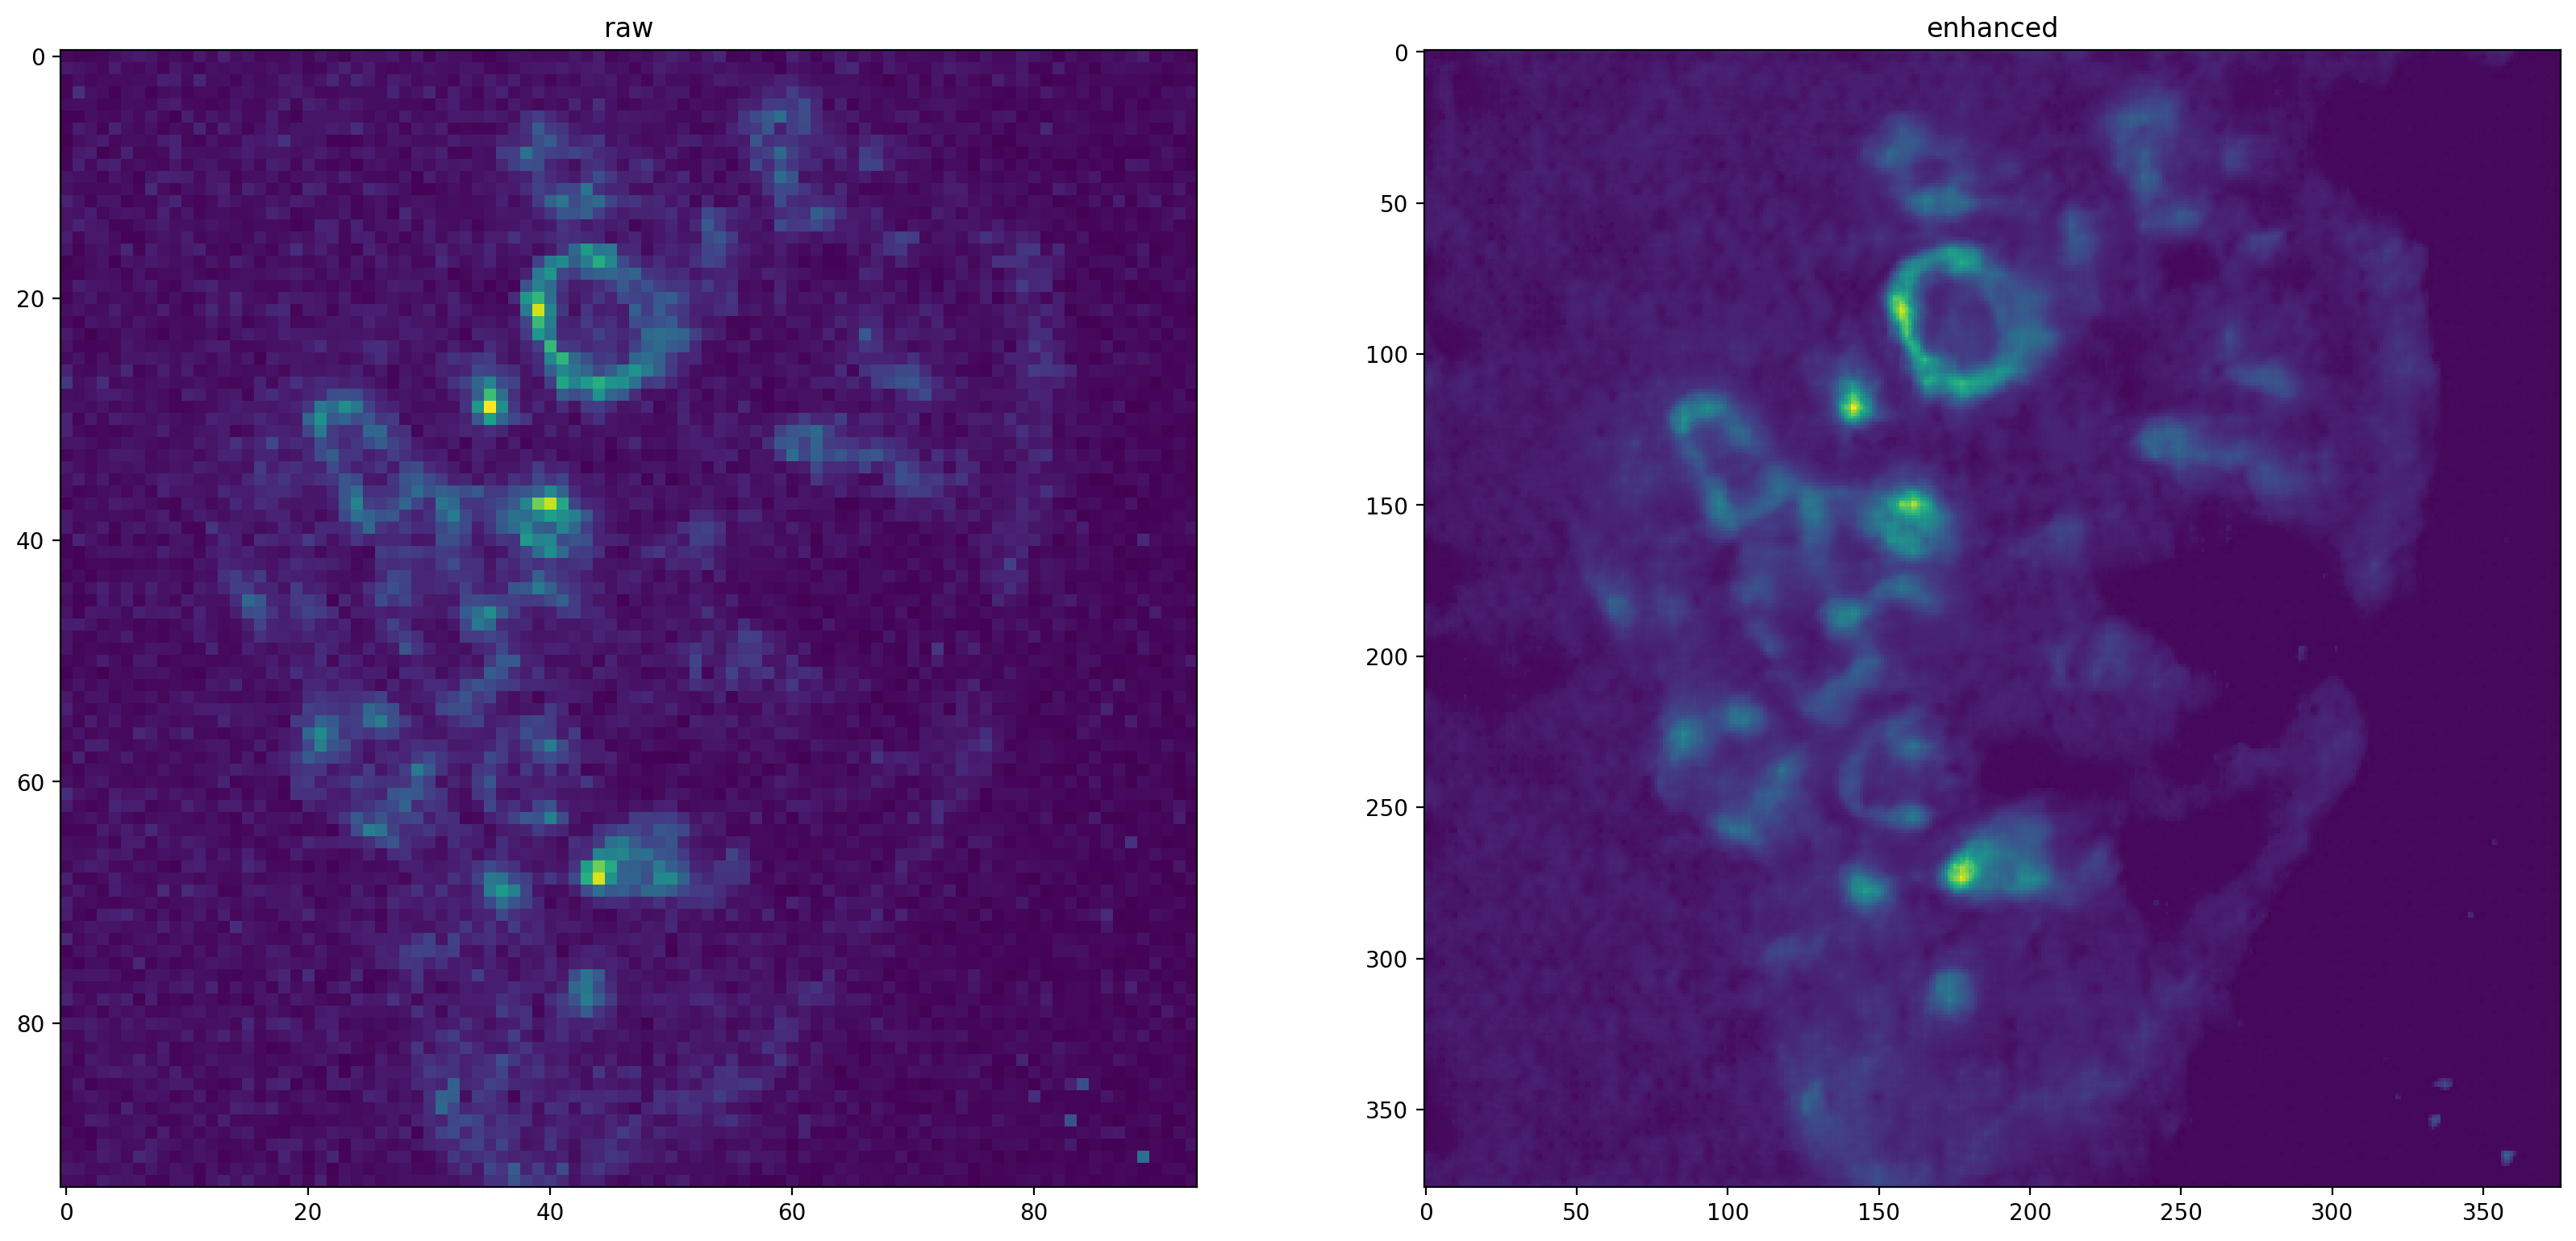

In [6]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(np.array(img)[:,:,0])
plt.title('raw')
plt.subplot(122)
plt.imshow(restored[:,:])
plt.title('enhanced')

Text(0.5, 1.0, 'enhanced')

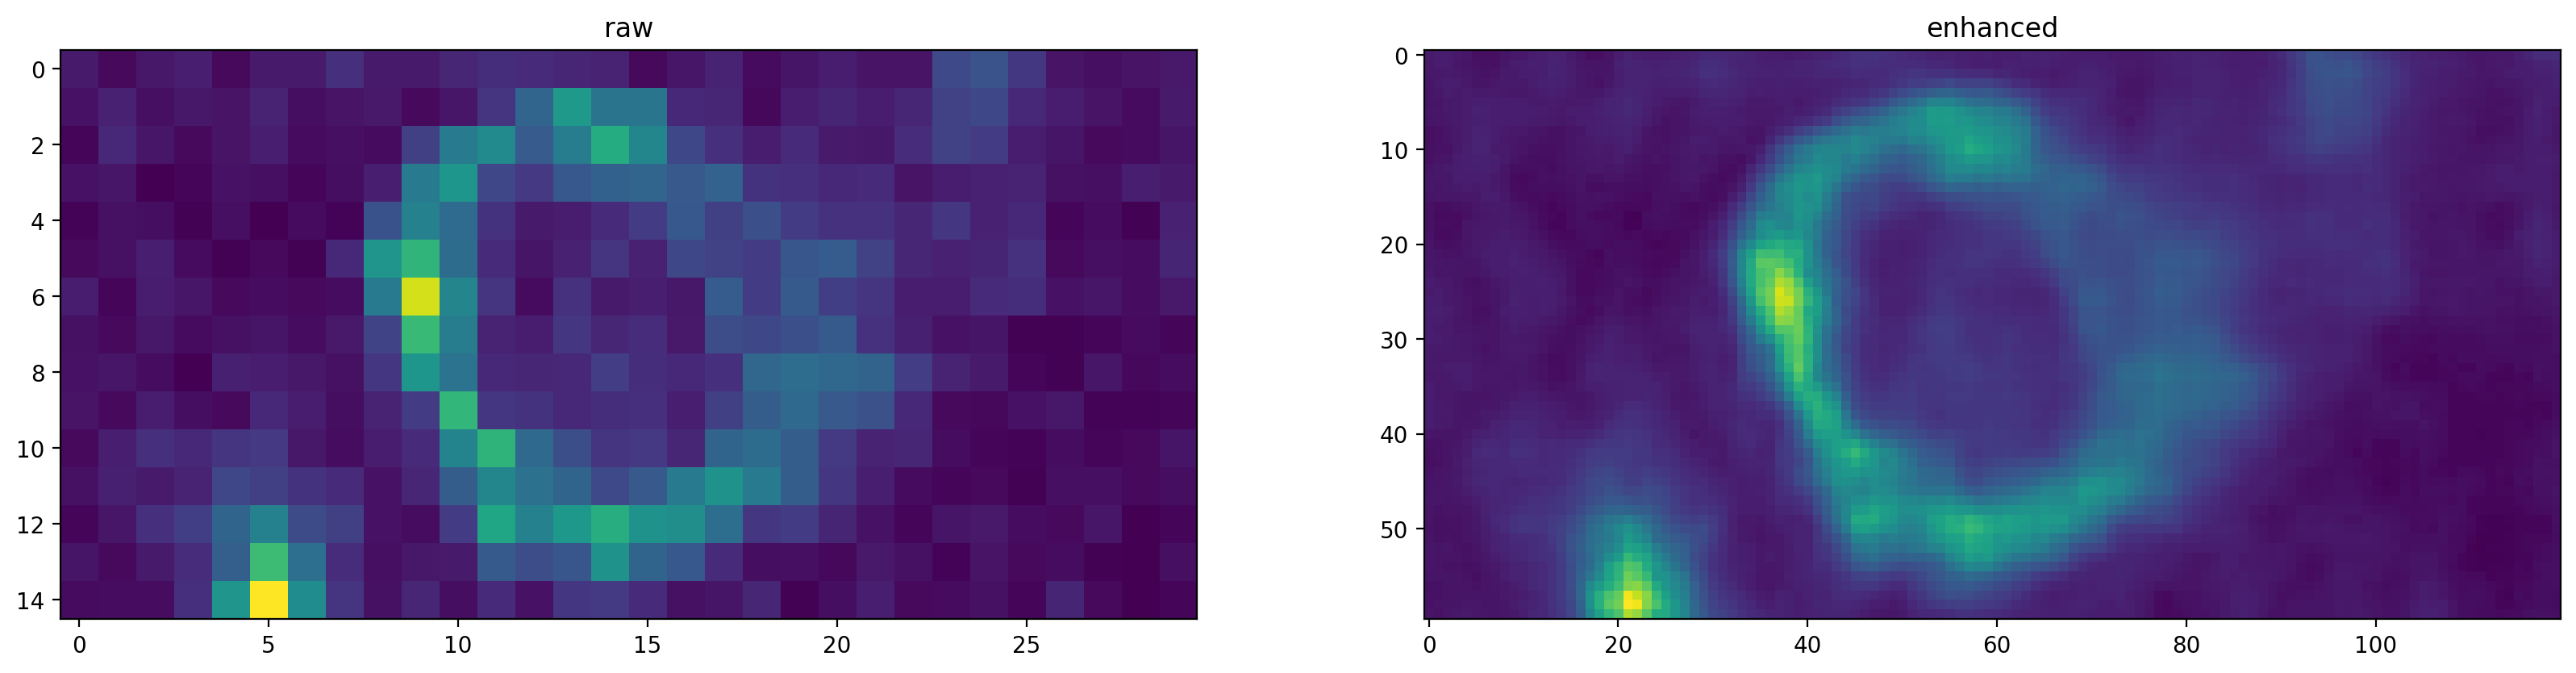

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(np.array(img)[:,:,0][15:30,30:60])
plt.title('raw')
plt.subplot(122)
plt.imshow(restored[:,:][60:120,120:240])
plt.title('enhanced')

Text(0.5, 1.0, 'hr')

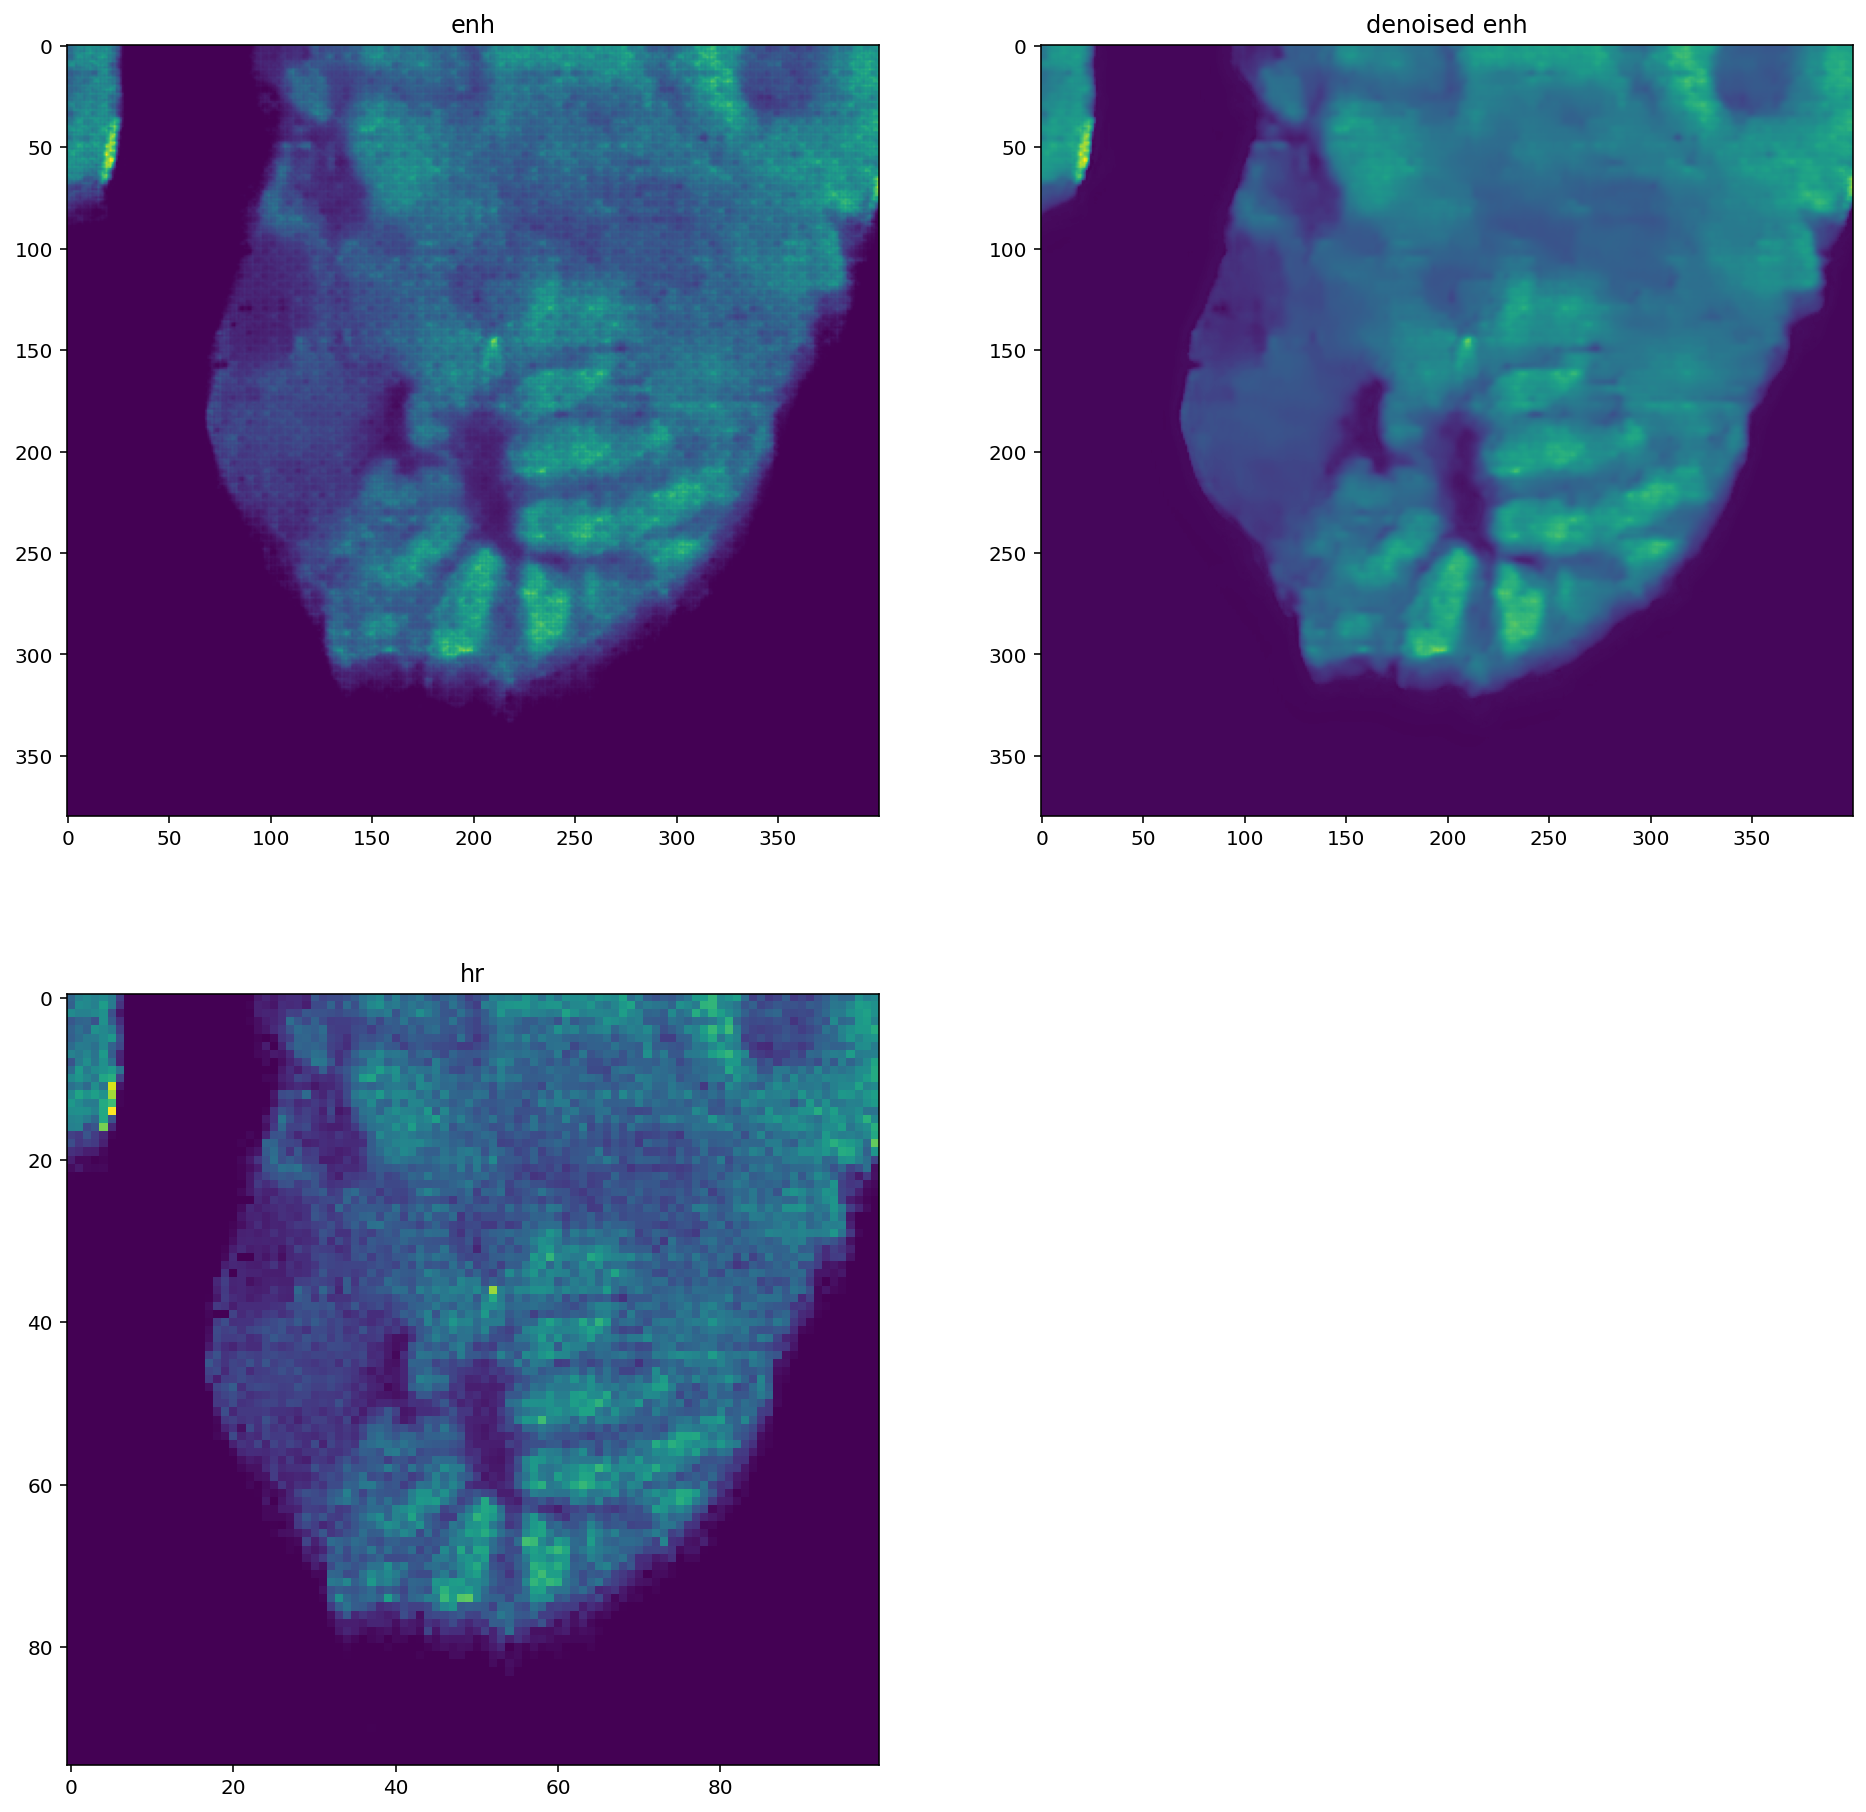

In [25]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img[420:800,780:1180])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[420:800,780:1180])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[420//4:800//4,780//4:1180//4])
plt.title('hr')

Text(0.5, 1.0, 'hr')

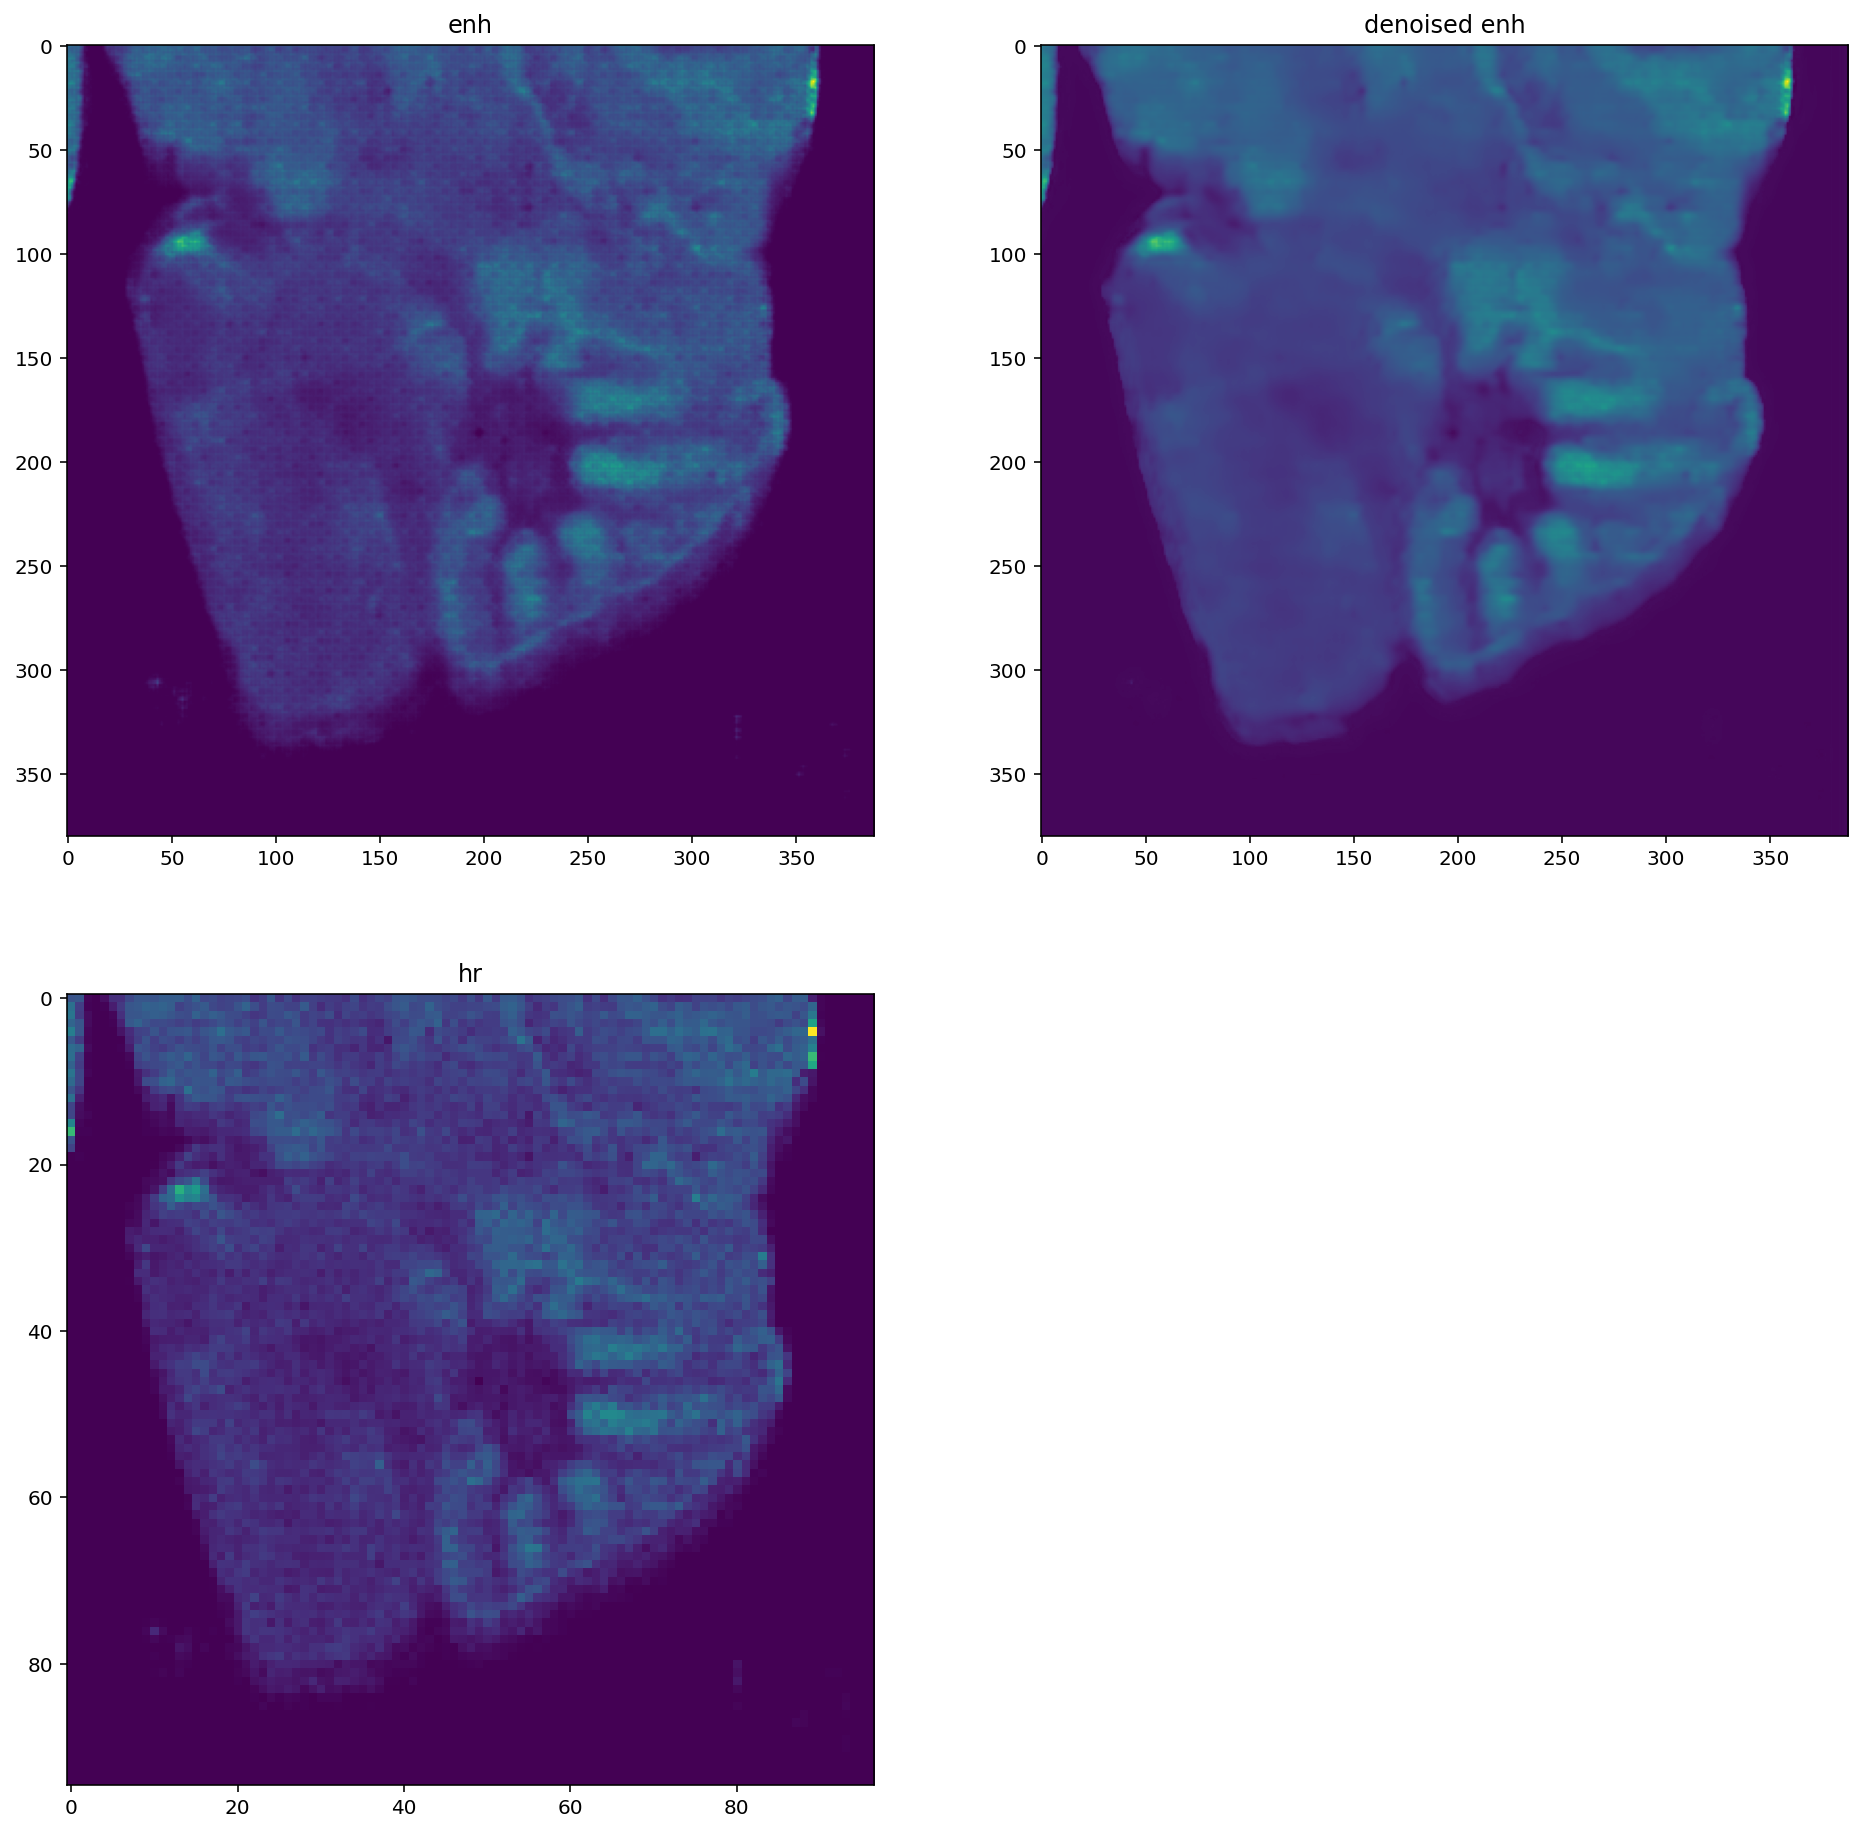

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img[420:800,1180:])
plt.title('enh')
plt.subplot(222)
plt.imshow(denoise[420:800,1180:])
plt.title('denoised enh')
plt.subplot(223)
plt.imshow(hr[420//4:800//4,1180//4:])
plt.title('hr')